In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((25*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((25*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(135, 100, 100)


In [17]:
print(y_test.shape)

(15, 100, 100)


In [18]:
print(x_train.shape)

(135, 15, 1)


In [19]:
print(x_test.shape)

(15, 15, 1)


In [20]:
theta_train.shape

(135,)

In [21]:
tsr_train.shape

(135,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((135, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((15, 2, 1))

In [28]:
tsr_theta_train.shape

(135, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
4/4 [==============================] - 1s 4ms/step - loss: 0.0291 - rmse: 0.1707
Epoch 2/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1585
Epoch 3/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1567
Epoch 4/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.1571
Epoch 5/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1567
Epoch 6/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0245 - rmse: 0.1564
Epoch 7/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1561
Epoch 8/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 9/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1561
Epoch 10/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1560
Epoch 11/10000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1527
Epoch 87/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 88/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 89/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 90/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1525
Epoch 91/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 92/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 93/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 94/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 95/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1521
Epoch 96/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1468
Epoch 171/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1467
Epoch 172/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1466
Epoch 173/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1469
Epoch 174/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1468
Epoch 175/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 176/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 177/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1463
Epoch 178/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 179/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1462
Epoch 180/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 255/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 256/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1431
Epoch 257/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 258/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1431
Epoch 259/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 260/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1430
Epoch 261/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1428
Epoch 262/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1428
Epoch 263/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1426
Epoch 264/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 339/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 340/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 341/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 342/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 343/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 344/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 345/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 346/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1351
Epoch 347/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 348/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 423/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 424/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 425/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1214
Epoch 426/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 427/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 428/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 429/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 430/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1205
Epoch 431/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1203
Epoch 432/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1030
Epoch 507/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 508/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 509/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1014
Epoch 510/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 511/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 512/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 513/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1009
Epoch 514/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0997
Epoch 515/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 516/10000
4/4 [=========================

4/4 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 591/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 592/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 593/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 594/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 595/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 596/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 597/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 598/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 599/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 600/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 675/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 676/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 677/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 678/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 679/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 680/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 681/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 682/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 683/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 684/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 759/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 760/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 761/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 762/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 763/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 764/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 765/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0604
Epoch 766/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 767/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 768/10000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 843/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 844/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 845/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 846/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 847/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 848/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 849/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 850/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 851/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 852/10000
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 927/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 928/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 929/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 930/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 931/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 932/10000
4/4 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 933/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 934/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 935/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 936/10000
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 1011/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 1012/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 1013/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 1014/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 1015/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 1016/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 1017/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 1018/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 1019/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 1020/10000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 9.2352e-04 - rmse: 0.0304
Epoch 1094/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.3400e-04 - rmse: 0.0306
Epoch 1095/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.4431e-04 - rmse: 0.0307
Epoch 1096/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.0982e-04 - rmse: 0.0302
Epoch 1097/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9355e-04 - rmse: 0.0299
Epoch 1098/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9565e-04 - rmse: 0.0299
Epoch 1099/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2060e-04 - rmse: 0.0303
Epoch 1100/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9891e-04 - rmse: 0.0300
Epoch 1101/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9933e-04 - rmse: 0.0300
Epoch 1102/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.4297e-04 - rmse: 0.03

4/4 [==============================] - 0s 3ms/step - loss: 8.0915e-04 - rmse: 0.0284
Epoch 1174/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7619e-04 - rmse: 0.0279
Epoch 1175/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.2117e-04 - rmse: 0.0269
Epoch 1176/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9967e-04 - rmse: 0.0283
Epoch 1177/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.3109e-04 - rmse: 0.0288
Epoch 1178/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8239e-04 - rmse: 0.0261
Epoch 1179/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.8250e-04 - rmse: 0.0261
Epoch 1180/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.3061e-04 - rmse: 0.0251
Epoch 1181/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2790e-04 - rmse: 0.0251
Epoch 1182/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5824e-04 - rmse: 0.02

4/4 [==============================] - 0s 4ms/step - loss: 5.1848e-04 - rmse: 0.0228
Epoch 1254/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.9198e-04 - rmse: 0.0222
Epoch 1255/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.7617e-04 - rmse: 0.0218
Epoch 1256/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.2741e-04 - rmse: 0.0230
Epoch 1257/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.9758e-04 - rmse: 0.0223
Epoch 1258/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.6463e-04 - rmse: 0.0216
Epoch 1259/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5430e-04 - rmse: 0.0213
Epoch 1260/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4034e-04 - rmse: 0.0210
Epoch 1261/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.4949e-04 - rmse: 0.0212
Epoch 1262/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.3025e-04 - rmse: 0.02

4/4 [==============================] - 0s 4ms/step - loss: 3.5478e-04 - rmse: 0.0188
Epoch 1334/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6699e-04 - rmse: 0.0192
Epoch 1335/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3746e-04 - rmse: 0.0184
Epoch 1336/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3195e-04 - rmse: 0.0182
Epoch 1337/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6423e-04 - rmse: 0.0191
Epoch 1338/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0563e-04 - rmse: 0.0201
Epoch 1339/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1920e-04 - rmse: 0.0205
Epoch 1340/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1860e-04 - rmse: 0.0205
Epoch 1341/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3200e-04 - rmse: 0.0208
Epoch 1342/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1347e-04 - rmse: 0.02

4/4 [==============================] - 0s 3ms/step - loss: 2.3785e-04 - rmse: 0.0154
Epoch 1414/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3888e-04 - rmse: 0.0155
Epoch 1415/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3168e-04 - rmse: 0.0152
Epoch 1416/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2670e-04 - rmse: 0.0151
Epoch 1417/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3089e-04 - rmse: 0.0152
Epoch 1418/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2489e-04 - rmse: 0.0150
Epoch 1419/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3297e-04 - rmse: 0.0153
Epoch 1420/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2984e-04 - rmse: 0.0152
Epoch 1421/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2605e-04 - rmse: 0.0150
Epoch 1422/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4527e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 1.7668e-04 - rmse: 0.0133
Epoch 1494/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6630e-04 - rmse: 0.0129
Epoch 1495/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6588e-04 - rmse: 0.0129
Epoch 1496/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7081e-04 - rmse: 0.0131
Epoch 1497/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6416e-04 - rmse: 0.0128
Epoch 1498/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7025e-04 - rmse: 0.0130
Epoch 1499/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6747e-04 - rmse: 0.0129
Epoch 1500/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6465e-04 - rmse: 0.0128
Epoch 1501/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7470e-04 - rmse: 0.0132
Epoch 1502/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8255e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 1.3699e-04 - rmse: 0.0117
Epoch 1574/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3020e-04 - rmse: 0.0114
Epoch 1575/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3145e-04 - rmse: 0.0115
Epoch 1576/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3000e-04 - rmse: 0.0114
Epoch 1577/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3001e-04 - rmse: 0.0114
Epoch 1578/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2377e-04 - rmse: 0.0111
Epoch 1579/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2625e-04 - rmse: 0.0112
Epoch 1580/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2983e-04 - rmse: 0.0114
Epoch 1581/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3143e-04 - rmse: 0.0115
Epoch 1582/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3972e-04 - rmse: 0.01

4/4 [==============================] - 0s 6ms/step - loss: 1.0009e-04 - rmse: 0.0100
Epoch 1654/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6066e-05 - rmse: 0.0098
Epoch 1655/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0052e-04 - rmse: 0.0100
Epoch 1656/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1662e-04 - rmse: 0.0108
Epoch 1657/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0892e-04 - rmse: 0.0104
Epoch 1658/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0667e-04 - rmse: 0.0103
Epoch 1659/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0027e-04 - rmse: 0.0100
Epoch 1660/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0028e-04 - rmse: 0.0100
Epoch 1661/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0352e-04 - rmse: 0.0102
Epoch 1662/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1109e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 7.5664e-05 - rmse: 0.0087
Epoch 1734/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.5758e-05 - rmse: 0.0087
Epoch 1735/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1822e-05 - rmse: 0.0085
Epoch 1736/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2787e-05 - rmse: 0.0085
Epoch 1737/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0615e-05 - rmse: 0.0084
Epoch 1738/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1847e-05 - rmse: 0.0085
Epoch 1739/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2086e-05 - rmse: 0.0085
Epoch 1740/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0558e-05 - rmse: 0.0084
Epoch 1741/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.5483e-05 - rmse: 0.0087
Epoch 1742/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9971e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.8425e-05 - rmse: 0.0089
Epoch 1814/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1018e-05 - rmse: 0.0084
Epoch 1815/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4817e-05 - rmse: 0.0081
Epoch 1816/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7112e-05 - rmse: 0.0082
Epoch 1817/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4931e-05 - rmse: 0.0081
Epoch 1818/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3195e-05 - rmse: 0.0079
Epoch 1819/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3585e-05 - rmse: 0.0080
Epoch 1820/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1223e-05 - rmse: 0.0078
Epoch 1821/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7808e-05 - rmse: 0.0076
Epoch 1822/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1436e-05 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 7.5565e-05 - rmse: 0.0087
Epoch 1894/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.4673e-05 - rmse: 0.0086
Epoch 1895/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.0032e-05 - rmse: 0.0084
Epoch 1896/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.4570e-05 - rmse: 0.0097
Epoch 1897/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1920e-04 - rmse: 0.0109
Epoch 1898/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1108e-04 - rmse: 0.0105
Epoch 1899/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.5438e-05 - rmse: 0.0098
Epoch 1900/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6879e-05 - rmse: 0.0098
Epoch 1901/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8763e-05 - rmse: 0.0089
Epoch 1902/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5864e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.7203e-05 - rmse: 0.0069
Epoch 1974/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4060e-05 - rmse: 0.0066
Epoch 1975/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1888e-05 - rmse: 0.0065
Epoch 1976/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3650e-05 - rmse: 0.0066
Epoch 1977/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6125e-05 - rmse: 0.0068
Epoch 1978/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1425e-05 - rmse: 0.0072
Epoch 1979/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9952e-05 - rmse: 0.0071
Epoch 1980/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6837e-05 - rmse: 0.0068
Epoch 1981/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5852e-05 - rmse: 0.0068
Epoch 1982/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.2652e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.6327e-05 - rmse: 0.0068
Epoch 2054/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3622e-05 - rmse: 0.0066
Epoch 2055/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4326e-05 - rmse: 0.0067
Epoch 2056/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3138e-05 - rmse: 0.0066
Epoch 2057/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8393e-05 - rmse: 0.0070
Epoch 2058/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6334e-05 - rmse: 0.0068
Epoch 2059/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9157e-05 - rmse: 0.0063
Epoch 2060/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8229e-05 - rmse: 0.0062
Epoch 2061/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9783e-05 - rmse: 0.0063
Epoch 2062/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0306e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.9723e-05 - rmse: 0.0063
Epoch 2134/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1425e-05 - rmse: 0.0064
Epoch 2135/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8790e-05 - rmse: 0.0062
Epoch 2136/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5731e-05 - rmse: 0.0060
Epoch 2137/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9453e-05 - rmse: 0.0063
Epoch 2138/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8008e-05 - rmse: 0.0062
Epoch 2139/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9025e-05 - rmse: 0.0062
Epoch 2140/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7591e-05 - rmse: 0.0061
Epoch 2141/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4778e-05 - rmse: 0.0059
Epoch 2142/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5145e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.5138e-05 - rmse: 0.0074
Epoch 2214/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6776e-05 - rmse: 0.0075
Epoch 2215/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1753e-05 - rmse: 0.0072
Epoch 2216/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2133e-05 - rmse: 0.0065
Epoch 2217/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2874e-05 - rmse: 0.0073
Epoch 2218/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8740e-05 - rmse: 0.0083
Epoch 2219/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7803e-05 - rmse: 0.0076
Epoch 2220/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4853e-05 - rmse: 0.0074
Epoch 2221/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5836e-05 - rmse: 0.0075
Epoch 2222/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9125e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.1546e-05 - rmse: 0.0056
Epoch 2294/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8664e-05 - rmse: 0.0054
Epoch 2295/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1891e-05 - rmse: 0.0056
Epoch 2296/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7122e-05 - rmse: 0.0052
Epoch 2297/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9598e-05 - rmse: 0.0054
Epoch 2298/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1136e-05 - rmse: 0.0056
Epoch 2299/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1825e-05 - rmse: 0.0056
Epoch 2300/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4425e-05 - rmse: 0.0059
Epoch 2301/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9546e-05 - rmse: 0.0054
Epoch 2302/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6648e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.5987e-05 - rmse: 0.0075
Epoch 2374/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7482e-05 - rmse: 0.0061
Epoch 2375/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5260e-05 - rmse: 0.0059
Epoch 2376/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6815e-05 - rmse: 0.0061
Epoch 2377/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.4911e-05 - rmse: 0.0059
Epoch 2378/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0419e-05 - rmse: 0.0055
Epoch 2379/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1313e-05 - rmse: 0.0056
Epoch 2380/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2103e-05 - rmse: 0.0057
Epoch 2381/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8814e-05 - rmse: 0.0054
Epoch 2382/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9146e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.6143e-05 - rmse: 0.0051
Epoch 2454/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6057e-05 - rmse: 0.0051
Epoch 2455/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4619e-05 - rmse: 0.0050
Epoch 2456/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3310e-05 - rmse: 0.0048
Epoch 2457/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6893e-05 - rmse: 0.0052
Epoch 2458/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0020e-05 - rmse: 0.0055
Epoch 2459/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1881e-05 - rmse: 0.0056
Epoch 2460/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7989e-05 - rmse: 0.0062
Epoch 2461/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7658e-05 - rmse: 0.0061
Epoch 2462/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4599e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.2912e-05 - rmse: 0.0048
Epoch 2534/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2192e-05 - rmse: 0.0047
Epoch 2535/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4719e-05 - rmse: 0.0050
Epoch 2536/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2157e-05 - rmse: 0.0047
Epoch 2537/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3442e-05 - rmse: 0.0048
Epoch 2538/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3469e-05 - rmse: 0.0048
Epoch 2539/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2538e-05 - rmse: 0.0047
Epoch 2540/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4667e-05 - rmse: 0.0050
Epoch 2541/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5357e-05 - rmse: 0.0050
Epoch 2542/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1035e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.0426e-04 - rmse: 0.0102
Epoch 2614/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3271e-04 - rmse: 0.0115
Epoch 2615/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4282e-04 - rmse: 0.0120
Epoch 2616/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7758e-04 - rmse: 0.0133
Epoch 2617/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2290e-04 - rmse: 0.0111
Epoch 2618/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2601e-05 - rmse: 0.0096
Epoch 2619/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.4718e-05 - rmse: 0.0097
Epoch 2620/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2862e-04 - rmse: 0.0113
Epoch 2621/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.8311e-05 - rmse: 0.0099
Epoch 2622/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8528e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.9773e-05 - rmse: 0.0071
Epoch 2694/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3887e-05 - rmse: 0.0086
Epoch 2695/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.5586e-05 - rmse: 0.0087
Epoch 2696/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.0690e-05 - rmse: 0.0084
Epoch 2697/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.1907e-05 - rmse: 0.0091
Epoch 2698/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.2648e-05 - rmse: 0.0091
Epoch 2699/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2720e-05 - rmse: 0.0096
Epoch 2700/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.8591e-05 - rmse: 0.0083
Epoch 2701/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.0065e-05 - rmse: 0.0084
Epoch 2702/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2622e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.2939e-05 - rmse: 0.0048
Epoch 2774/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6383e-05 - rmse: 0.0051
Epoch 2775/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9280e-05 - rmse: 0.0070
Epoch 2776/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4873e-05 - rmse: 0.0059
Epoch 2777/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8435e-05 - rmse: 0.0053
Epoch 2778/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6179e-05 - rmse: 0.0051
Epoch 2779/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4585e-05 - rmse: 0.0050
Epoch 2780/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3485e-05 - rmse: 0.0048
Epoch 2781/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2068e-05 - rmse: 0.0047
Epoch 2782/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9082e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.6312e-05 - rmse: 0.0040
Epoch 2854/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8966e-05 - rmse: 0.0044
Epoch 2855/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0873e-05 - rmse: 0.0046
Epoch 2856/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1058e-05 - rmse: 0.0046
Epoch 2857/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9339e-05 - rmse: 0.0044
Epoch 2858/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7489e-05 - rmse: 0.0042
Epoch 2859/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9207e-05 - rmse: 0.0044
Epoch 2860/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0765e-05 - rmse: 0.0046
Epoch 2861/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2566e-05 - rmse: 0.0048
Epoch 2862/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7892e-05 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 2.8935e-05 - rmse: 0.0054
Epoch 2934/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6659e-05 - rmse: 0.0052
Epoch 2935/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3584e-05 - rmse: 0.0058
Epoch 2936/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.3862e-05 - rmse: 0.0049
Epoch 2937/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8295e-05 - rmse: 0.0043
Epoch 2938/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.8697e-05 - rmse: 0.0043
Epoch 2939/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9037e-05 - rmse: 0.0044
Epoch 2940/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1408e-05 - rmse: 0.0046
Epoch 2941/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.7180e-05 - rmse: 0.0041
Epoch 2942/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.6806e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.4441e-05 - rmse: 0.0038
Epoch 3014/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6507e-05 - rmse: 0.0041
Epoch 3015/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7716e-05 - rmse: 0.0042
Epoch 3016/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8922e-05 - rmse: 0.0043
Epoch 3017/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5434e-05 - rmse: 0.0039
Epoch 3018/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0049e-05 - rmse: 0.0045
Epoch 3019/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7549e-05 - rmse: 0.0042
Epoch 3020/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5126e-05 - rmse: 0.0050
Epoch 3021/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6743e-05 - rmse: 0.0041
Epoch 3022/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0598e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.9001e-05 - rmse: 0.0070
Epoch 3094/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7990e-05 - rmse: 0.0069
Epoch 3095/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.5932e-05 - rmse: 0.0060
Epoch 3096/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.1487e-05 - rmse: 0.0056
Epoch 3097/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5860e-05 - rmse: 0.0051
Epoch 3098/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.9910e-05 - rmse: 0.0063
Epoch 3099/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.3533e-05 - rmse: 0.0066
Epoch 3100/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.1396e-05 - rmse: 0.0078
Epoch 3101/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1374e-05 - rmse: 0.0072
Epoch 3102/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0404e-04 - rmse: 0.01

4/4 [==============================] - 0s 4ms/step - loss: 1.2531e-05 - rmse: 0.0035
Epoch 3174/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4504e-05 - rmse: 0.0038
Epoch 3175/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.5367e-05 - rmse: 0.0039
Epoch 3176/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.4479e-05 - rmse: 0.0038
Epoch 3177/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2985e-05 - rmse: 0.0036
Epoch 3178/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2018e-05 - rmse: 0.0035
Epoch 3179/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1797e-05 - rmse: 0.0034
Epoch 3180/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2773e-05 - rmse: 0.0036
Epoch 3181/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2838e-05 - rmse: 0.0036
Epoch 3182/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5799e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.1734e-05 - rmse: 0.0034
Epoch 3254/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1708e-05 - rmse: 0.0034
Epoch 3255/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2630e-05 - rmse: 0.0036
Epoch 3256/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2668e-05 - rmse: 0.0036
Epoch 3257/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3565e-05 - rmse: 0.0037
Epoch 3258/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1754e-05 - rmse: 0.0034
Epoch 3259/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.1748e-05 - rmse: 0.0034
Epoch 3260/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0157e-05 - rmse: 0.0032
Epoch 3261/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1010e-05 - rmse: 0.0033
Epoch 3262/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1313e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.5642e-05 - rmse: 0.0040
Epoch 3334/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8386e-05 - rmse: 0.0043
Epoch 3335/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6499e-05 - rmse: 0.0041
Epoch 3336/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5402e-05 - rmse: 0.0039
Epoch 3337/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5822e-05 - rmse: 0.0040
Epoch 3338/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8107e-05 - rmse: 0.0043
Epoch 3339/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7176e-05 - rmse: 0.0052
Epoch 3340/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9306e-05 - rmse: 0.0054
Epoch 3341/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9433e-05 - rmse: 0.0077
Epoch 3342/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5419e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.2233e-05 - rmse: 0.0047
Epoch 3414/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.3167e-05 - rmse: 0.0048
Epoch 3415/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.8876e-05 - rmse: 0.0054
Epoch 3416/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1051e-05 - rmse: 0.0046
Epoch 3417/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3564e-05 - rmse: 0.0066
Epoch 3418/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.3404e-05 - rmse: 0.0058
Epoch 3419/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.6380e-05 - rmse: 0.0051
Epoch 3420/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.8225e-05 - rmse: 0.0069
Epoch 3421/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9625e-05 - rmse: 0.0063
Epoch 3422/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2621e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.2707e-05 - rmse: 0.0036
Epoch 3494/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6373e-05 - rmse: 0.0040
Epoch 3495/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1622e-05 - rmse: 0.0046
Epoch 3496/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.0923e-05 - rmse: 0.0056
Epoch 3497/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2021e-05 - rmse: 0.0072
Epoch 3498/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4165e-05 - rmse: 0.0058
Epoch 3499/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6263e-05 - rmse: 0.0051
Epoch 3500/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5806e-05 - rmse: 0.0051
Epoch 3501/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1361e-05 - rmse: 0.0056
Epoch 3502/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9820e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.0786e-05 - rmse: 0.0055
Epoch 3574/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3259e-05 - rmse: 0.0066
Epoch 3575/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0681e-05 - rmse: 0.0064
Epoch 3576/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.4297e-05 - rmse: 0.0049
Epoch 3577/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.2222e-05 - rmse: 0.0047
Epoch 3578/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7905e-05 - rmse: 0.0042
Epoch 3579/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0150e-05 - rmse: 0.0045
Epoch 3580/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.8717e-05 - rmse: 0.0043
Epoch 3581/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1859e-05 - rmse: 0.0047
Epoch 3582/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8701e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.7669e-06 - rmse: 0.0030
Epoch 3654/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8967e-06 - rmse: 0.0030
Epoch 3655/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2166e-06 - rmse: 0.0030
Epoch 3656/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8807e-06 - rmse: 0.0030
Epoch 3657/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.8259e-06 - rmse: 0.0031
Epoch 3658/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4305e-05 - rmse: 0.0038
Epoch 3659/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3100e-05 - rmse: 0.0036
Epoch 3660/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6182e-05 - rmse: 0.0040
Epoch 3661/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9910e-05 - rmse: 0.0045
Epoch 3662/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0289e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.1866e-05 - rmse: 0.0065
Epoch 3734/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3775e-05 - rmse: 0.0058
Epoch 3735/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9387e-05 - rmse: 0.0054
Epoch 3736/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.8358e-05 - rmse: 0.0062
Epoch 3737/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9289e-05 - rmse: 0.0054
Epoch 3738/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0469e-05 - rmse: 0.0055
Epoch 3739/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6421e-05 - rmse: 0.0060
Epoch 3740/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1870e-05 - rmse: 0.0079
Epoch 3741/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7239e-05 - rmse: 0.0069
Epoch 3742/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8413e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.1505e-05 - rmse: 0.0064
Epoch 3814/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5117e-05 - rmse: 0.0059
Epoch 3815/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1821e-05 - rmse: 0.0056
Epoch 3816/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5472e-05 - rmse: 0.0050
Epoch 3817/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7603e-05 - rmse: 0.0053
Epoch 3818/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3698e-05 - rmse: 0.0049
Epoch 3819/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.5642e-05 - rmse: 0.0060
Epoch 3820/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7517e-05 - rmse: 0.0061
Epoch 3821/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9716e-05 - rmse: 0.0077
Epoch 3822/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1327e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.5103e-05 - rmse: 0.0039
Epoch 3894/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3864e-05 - rmse: 0.0037
Epoch 3895/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3419e-05 - rmse: 0.0037
Epoch 3896/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2363e-05 - rmse: 0.0035
Epoch 3897/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2551e-05 - rmse: 0.0035
Epoch 3898/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1815e-05 - rmse: 0.0034
Epoch 3899/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3469e-05 - rmse: 0.0037
Epoch 3900/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0594e-05 - rmse: 0.0033
Epoch 3901/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4975e-05 - rmse: 0.0039
Epoch 3902/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3144e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.9104e-06 - rmse: 0.0026
Epoch 3974/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1695e-06 - rmse: 0.0027
Epoch 3975/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9119e-06 - rmse: 0.0026
Epoch 3976/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5717e-06 - rmse: 0.0026
Epoch 3977/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5297e-06 - rmse: 0.0026
Epoch 3978/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8221e-06 - rmse: 0.0028
Epoch 3979/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0082e-05 - rmse: 0.0032
Epoch 3980/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8164e-06 - rmse: 0.0030
Epoch 3981/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8605e-06 - rmse: 0.0030
Epoch 3982/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.0382e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.1088e-05 - rmse: 0.0033
Epoch 4054/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2592e-05 - rmse: 0.0035
Epoch 4055/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2961e-05 - rmse: 0.0036
Epoch 4056/10000
4/4 [==============================] - 0s 3ms/step - loss: 9.8967e-06 - rmse: 0.0031
Epoch 4057/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1459e-05 - rmse: 0.0034
Epoch 4058/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0820e-05 - rmse: 0.0033
Epoch 4059/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2653e-05 - rmse: 0.0036
Epoch 4060/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.8831e-06 - rmse: 0.0031
Epoch 4061/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2174e-05 - rmse: 0.0035
Epoch 4062/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0671e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.4706e-05 - rmse: 0.0067
Epoch 4134/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3872e-05 - rmse: 0.0080
Epoch 4135/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3500e-05 - rmse: 0.0048
Epoch 4136/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1563e-05 - rmse: 0.0046
Epoch 4137/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7502e-05 - rmse: 0.0042
Epoch 4138/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3785e-05 - rmse: 0.0049
Epoch 4139/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5724e-05 - rmse: 0.0051
Epoch 4140/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3194e-05 - rmse: 0.0048
Epoch 4141/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9064e-05 - rmse: 0.0044
Epoch 4142/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1208e-05 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 1.5786e-05 - rmse: 0.0040
Epoch 4214/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0935e-05 - rmse: 0.0033
Epoch 4215/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0591e-05 - rmse: 0.0033
Epoch 4216/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.6053e-06 - rmse: 0.0029
Epoch 4217/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.4811e-06 - rmse: 0.0029
Epoch 4218/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.0384e-06 - rmse: 0.0028
Epoch 4219/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.0971e-06 - rmse: 0.0028
Epoch 4220/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0241e-05 - rmse: 0.0032
Epoch 4221/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.7271e-06 - rmse: 0.0028
Epoch 4222/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4298e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.5079e-05 - rmse: 0.0039
Epoch 4294/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1792e-05 - rmse: 0.0034
Epoch 4295/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.3578e-05 - rmse: 0.0037
Epoch 4296/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1156e-05 - rmse: 0.0033
Epoch 4297/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.0795e-05 - rmse: 0.0033
Epoch 4298/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3993e-06 - rmse: 0.0029
Epoch 4299/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.9202e-06 - rmse: 0.0028
Epoch 4300/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.5054e-06 - rmse: 0.0027
Epoch 4301/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.3812e-06 - rmse: 0.0029
Epoch 4302/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.0158e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.2665e-06 - rmse: 0.0027
Epoch 4374/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5071e-06 - rmse: 0.0026
Epoch 4375/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8577e-06 - rmse: 0.0024
Epoch 4376/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4088e-06 - rmse: 0.0025
Epoch 4377/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4711e-06 - rmse: 0.0027
Epoch 4378/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.5132e-06 - rmse: 0.0027
Epoch 4379/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7228e-06 - rmse: 0.0028
Epoch 4380/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4143e-06 - rmse: 0.0027
Epoch 4381/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.0857e-06 - rmse: 0.0028
Epoch 4382/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2632e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.3209e-05 - rmse: 0.0036
Epoch 4454/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7634e-05 - rmse: 0.0042
Epoch 4455/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0919e-05 - rmse: 0.0033
Epoch 4456/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3067e-05 - rmse: 0.0036
Epoch 4457/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4423e-05 - rmse: 0.0038
Epoch 4458/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6368e-05 - rmse: 0.0051
Epoch 4459/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5587e-05 - rmse: 0.0051
Epoch 4460/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9720e-05 - rmse: 0.0044
Epoch 4461/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6442e-05 - rmse: 0.0041
Epoch 4462/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3716e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 9.1583e-06 - rmse: 0.0030
Epoch 4534/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8732e-06 - rmse: 0.0026
Epoch 4535/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3501e-06 - rmse: 0.0025
Epoch 4536/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2182e-06 - rmse: 0.0025
Epoch 4537/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.6383e-06 - rmse: 0.0026
Epoch 4538/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.6527e-06 - rmse: 0.0026
Epoch 4539/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8756e-06 - rmse: 0.0026
Epoch 4540/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4636e-06 - rmse: 0.0025
Epoch 4541/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6467e-06 - rmse: 0.0028
Epoch 4542/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7242e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.2862e-04 - rmse: 0.0113
Epoch 4614/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1337e-05 - rmse: 0.0072
Epoch 4615/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7089e-05 - rmse: 0.0061
Epoch 4616/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0076e-05 - rmse: 0.0055
Epoch 4617/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9425e-05 - rmse: 0.0054
Epoch 4618/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7655e-05 - rmse: 0.0053
Epoch 4619/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3984e-05 - rmse: 0.0049
Epoch 4620/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3486e-05 - rmse: 0.0048
Epoch 4621/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0334e-05 - rmse: 0.0055
Epoch 4622/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0875e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.3751e-06 - rmse: 0.0025
Epoch 4694/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6378e-06 - rmse: 0.0028
Epoch 4695/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.4789e-06 - rmse: 0.0025
Epoch 4696/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.6418e-06 - rmse: 0.0026
Epoch 4697/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8354e-06 - rmse: 0.0026
Epoch 4698/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6763e-06 - rmse: 0.0028
Epoch 4699/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8496e-06 - rmse: 0.0026
Epoch 4700/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7869e-06 - rmse: 0.0028
Epoch 4701/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3786e-06 - rmse: 0.0027
Epoch 4702/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8975e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.0150e-05 - rmse: 0.0045
Epoch 4774/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6331e-05 - rmse: 0.0040
Epoch 4775/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0262e-05 - rmse: 0.0045
Epoch 4776/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5860e-05 - rmse: 0.0051
Epoch 4777/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2300e-05 - rmse: 0.0047
Epoch 4778/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0783e-05 - rmse: 0.0046
Epoch 4779/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7237e-05 - rmse: 0.0042
Epoch 4780/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.7874e-05 - rmse: 0.0042
Epoch 4781/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.9518e-05 - rmse: 0.0044
Epoch 4782/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0746e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 9.4166e-06 - rmse: 0.0031
Epoch 4854/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9819e-06 - rmse: 0.0028
Epoch 4855/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.1618e-06 - rmse: 0.0029
Epoch 4856/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.0397e-06 - rmse: 0.0028
Epoch 4857/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9103e-06 - rmse: 0.0028
Epoch 4858/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4809e-06 - rmse: 0.0027
Epoch 4859/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.0706e-06 - rmse: 0.0028
Epoch 4860/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7273e-06 - rmse: 0.0028
Epoch 4861/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.8333e-06 - rmse: 0.0031
Epoch 4862/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3838e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.6671e-05 - rmse: 0.0041
Epoch 4934/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1270e-05 - rmse: 0.0046
Epoch 4935/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2778e-05 - rmse: 0.0048
Epoch 4936/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0469e-05 - rmse: 0.0071
Epoch 4937/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7297e-05 - rmse: 0.0069
Epoch 4938/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4087e-05 - rmse: 0.0074
Epoch 4939/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6877e-05 - rmse: 0.0061
Epoch 4940/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2361e-05 - rmse: 0.0065
Epoch 4941/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8857e-05 - rmse: 0.0062
Epoch 4942/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7668e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.2890e-05 - rmse: 0.0036
Epoch 5014/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0366e-05 - rmse: 0.0032
Epoch 5015/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1202e-05 - rmse: 0.0033
Epoch 5016/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4003e-06 - rmse: 0.0029
Epoch 5017/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.7700e-06 - rmse: 0.0031
Epoch 5018/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7793e-06 - rmse: 0.0030
Epoch 5019/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7311e-06 - rmse: 0.0030
Epoch 5020/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3597e-06 - rmse: 0.0029
Epoch 5021/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0838e-05 - rmse: 0.0033
Epoch 5022/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7481e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.1059e-05 - rmse: 0.0033
Epoch 5094/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1926e-05 - rmse: 0.0035
Epoch 5095/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2508e-05 - rmse: 0.0035
Epoch 5096/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1571e-05 - rmse: 0.0034
Epoch 5097/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1939e-05 - rmse: 0.0035
Epoch 5098/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5725e-05 - rmse: 0.0040
Epoch 5099/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2341e-05 - rmse: 0.0047
Epoch 5100/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7897e-05 - rmse: 0.0042
Epoch 5101/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7913e-05 - rmse: 0.0042
Epoch 5102/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5665e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.9204e-06 - rmse: 0.0024
Epoch 5174/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8377e-06 - rmse: 0.0024
Epoch 5175/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5285e-06 - rmse: 0.0026
Epoch 5176/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6247e-06 - rmse: 0.0024
Epoch 5177/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7351e-06 - rmse: 0.0024
Epoch 5178/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1048e-06 - rmse: 0.0023
Epoch 5179/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.5219e-06 - rmse: 0.0023
Epoch 5180/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5621e-06 - rmse: 0.0024
Epoch 5181/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.0846e-06 - rmse: 0.0023
Epoch 5182/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0271e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.0623e-05 - rmse: 0.0033
Epoch 5254/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3903e-05 - rmse: 0.0037
Epoch 5255/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8475e-05 - rmse: 0.0043
Epoch 5256/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6986e-05 - rmse: 0.0041
Epoch 5257/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3746e-05 - rmse: 0.0037
Epoch 5258/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5640e-05 - rmse: 0.0040
Epoch 5259/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6907e-05 - rmse: 0.0041
Epoch 5260/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4606e-05 - rmse: 0.0038
Epoch 5261/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4572e-05 - rmse: 0.0038
Epoch 5262/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6473e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.2244e-05 - rmse: 0.0035
Epoch 5334/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6495e-05 - rmse: 0.0041
Epoch 5335/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3358e-05 - rmse: 0.0037
Epoch 5336/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3578e-05 - rmse: 0.0037
Epoch 5337/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2865e-05 - rmse: 0.0036
Epoch 5338/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0375e-05 - rmse: 0.0032
Epoch 5339/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0745e-05 - rmse: 0.0033
Epoch 5340/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3249e-05 - rmse: 0.0036
Epoch 5341/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1350e-05 - rmse: 0.0034
Epoch 5342/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0936e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.5922e-05 - rmse: 0.0060
Epoch 5414/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0011e-05 - rmse: 0.0063
Epoch 5415/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.4182e-05 - rmse: 0.0058
Epoch 5416/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.6460e-05 - rmse: 0.0060
Epoch 5417/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0031e-05 - rmse: 0.0063
Epoch 5418/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.8189e-05 - rmse: 0.0062
Epoch 5419/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0696e-05 - rmse: 0.0055
Epoch 5420/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.0842e-05 - rmse: 0.0046
Epoch 5421/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1269e-05 - rmse: 0.0046
Epoch 5422/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9845e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.3675e-05 - rmse: 0.0049
Epoch 5494/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1360e-05 - rmse: 0.0046
Epoch 5495/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8960e-05 - rmse: 0.0044
Epoch 5496/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6064e-05 - rmse: 0.0040
Epoch 5497/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3518e-05 - rmse: 0.0037
Epoch 5498/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6206e-05 - rmse: 0.0040
Epoch 5499/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4450e-05 - rmse: 0.0049
Epoch 5500/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6950e-05 - rmse: 0.0052
Epoch 5501/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5211e-05 - rmse: 0.0050
Epoch 5502/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1148e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.2576e-06 - rmse: 0.0023
Epoch 5574/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4901e-06 - rmse: 0.0023
Epoch 5575/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5699e-06 - rmse: 0.0024
Epoch 5576/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8624e-06 - rmse: 0.0024
Epoch 5577/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4590e-06 - rmse: 0.0027
Epoch 5578/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0997e-05 - rmse: 0.0033
Epoch 5579/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.0940e-06 - rmse: 0.0030
Epoch 5580/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7599e-06 - rmse: 0.0026
Epoch 5581/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3935e-06 - rmse: 0.0025
Epoch 5582/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7739e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.9798e-05 - rmse: 0.0044
Epoch 5654/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9899e-05 - rmse: 0.0045
Epoch 5655/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.9701e-05 - rmse: 0.0044
Epoch 5656/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8186e-05 - rmse: 0.0062
Epoch 5657/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0543e-04 - rmse: 0.0103
Epoch 5658/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8934e-04 - rmse: 0.0138
Epoch 5659/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3218e-04 - rmse: 0.0152
Epoch 5660/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5147e-04 - rmse: 0.0123
Epoch 5661/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1338e-04 - rmse: 0.0106
Epoch 5662/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9695e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.5633e-06 - rmse: 0.0028
Epoch 5734/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4328e-06 - rmse: 0.0027
Epoch 5735/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9344e-06 - rmse: 0.0024
Epoch 5736/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9335e-06 - rmse: 0.0024
Epoch 5737/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.5909e-06 - rmse: 0.0024
Epoch 5738/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4391e-06 - rmse: 0.0029
Epoch 5739/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.6701e-06 - rmse: 0.0029
Epoch 5740/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.6337e-06 - rmse: 0.0029
Epoch 5741/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1087e-05 - rmse: 0.0033
Epoch 5742/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3655e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.5159e-06 - rmse: 0.0027
Epoch 5814/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2156e-06 - rmse: 0.0027
Epoch 5815/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3867e-06 - rmse: 0.0025
Epoch 5816/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8301e-06 - rmse: 0.0024
Epoch 5817/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4661e-06 - rmse: 0.0023
Epoch 5818/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4366e-06 - rmse: 0.0025
Epoch 5819/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2280e-06 - rmse: 0.0025
Epoch 5820/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1212e-05 - rmse: 0.0033
Epoch 5821/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7523e-06 - rmse: 0.0030
Epoch 5822/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0128e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.6232e-05 - rmse: 0.0040
Epoch 5894/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.4205e-05 - rmse: 0.0038
Epoch 5895/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.7086e-05 - rmse: 0.0041
Epoch 5896/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7114e-05 - rmse: 0.0041
Epoch 5897/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0723e-05 - rmse: 0.0046
Epoch 5898/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.2906e-05 - rmse: 0.0048
Epoch 5899/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.6970e-05 - rmse: 0.0041
Epoch 5900/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.4464e-05 - rmse: 0.0038
Epoch 5901/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3468e-05 - rmse: 0.0037
Epoch 5902/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1047e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.0730e-06 - rmse: 0.0023
Epoch 5974/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9782e-06 - rmse: 0.0026
Epoch 5975/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4016e-06 - rmse: 0.0023
Epoch 5976/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1131e-06 - rmse: 0.0025
Epoch 5977/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.2091e-06 - rmse: 0.0023
Epoch 5978/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.9940e-06 - rmse: 0.0022
Epoch 5979/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0990e-06 - rmse: 0.0023
Epoch 5980/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.6603e-06 - rmse: 0.0022
Epoch 5981/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9456e-06 - rmse: 0.0022
Epoch 5982/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5460e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.0987e-05 - rmse: 0.0033
Epoch 6054/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2951e-05 - rmse: 0.0036
Epoch 6055/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.5472e-05 - rmse: 0.0039
Epoch 6056/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.6296e-05 - rmse: 0.0040
Epoch 6057/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.6961e-05 - rmse: 0.0041
Epoch 6058/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6050e-05 - rmse: 0.0040
Epoch 6059/10000
4/4 [==============================] - 0s 3ms/step - loss: 2.1566e-05 - rmse: 0.0046
Epoch 6060/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6937e-05 - rmse: 0.0041
Epoch 6061/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2220e-05 - rmse: 0.0035
Epoch 6062/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2308e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.7642e-06 - rmse: 0.0024
Epoch 6134/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0803e-06 - rmse: 0.0025
Epoch 6135/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0710e-06 - rmse: 0.0023
Epoch 6136/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0355e-06 - rmse: 0.0022
Epoch 6137/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6041e-06 - rmse: 0.0021
Epoch 6138/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3045e-06 - rmse: 0.0021
Epoch 6139/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4017e-06 - rmse: 0.0021
Epoch 6140/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0434e-06 - rmse: 0.0020
Epoch 6141/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0993e-06 - rmse: 0.0020
Epoch 6142/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0619e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.3110e-06 - rmse: 0.0025
Epoch 6214/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3980e-06 - rmse: 0.0025
Epoch 6215/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9397e-06 - rmse: 0.0028
Epoch 6216/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.6676e-06 - rmse: 0.0029
Epoch 6217/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1662e-05 - rmse: 0.0034
Epoch 6218/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2203e-06 - rmse: 0.0030
Epoch 6219/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0490e-05 - rmse: 0.0032
Epoch 6220/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.7891e-06 - rmse: 0.0031
Epoch 6221/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0477e-05 - rmse: 0.0032
Epoch 6222/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0409e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.5186e-05 - rmse: 0.0087
Epoch 6294/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.8827e-05 - rmse: 0.0099
Epoch 6295/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0778e-04 - rmse: 0.0104
Epoch 6296/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3994e-04 - rmse: 0.0118
Epoch 6297/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9279e-05 - rmse: 0.0089
Epoch 6298/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.3131e-05 - rmse: 0.0073
Epoch 6299/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4292e-05 - rmse: 0.0067
Epoch 6300/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1570e-05 - rmse: 0.0085
Epoch 6301/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.6175e-05 - rmse: 0.0087
Epoch 6302/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3882e-05 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 1.9039e-05 - rmse: 0.0044
Epoch 6374/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7894e-05 - rmse: 0.0042
Epoch 6375/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5596e-05 - rmse: 0.0039
Epoch 6376/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.4343e-05 - rmse: 0.0038
Epoch 6377/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.1815e-05 - rmse: 0.0034
Epoch 6378/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.2538e-05 - rmse: 0.0035
Epoch 6379/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.2203e-05 - rmse: 0.0035
Epoch 6380/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1295e-05 - rmse: 0.0034
Epoch 6381/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5409e-05 - rmse: 0.0039
Epoch 6382/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2381e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.3888e-05 - rmse: 0.0037
Epoch 6454/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4462e-05 - rmse: 0.0038
Epoch 6455/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2843e-05 - rmse: 0.0036
Epoch 6456/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1538e-05 - rmse: 0.0034
Epoch 6457/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2174e-05 - rmse: 0.0035
Epoch 6458/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0347e-05 - rmse: 0.0032
Epoch 6459/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8684e-06 - rmse: 0.0030
Epoch 6460/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7638e-05 - rmse: 0.0042
Epoch 6461/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9818e-05 - rmse: 0.0045
Epoch 6462/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9840e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.4931e-05 - rmse: 0.0039
Epoch 6534/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0678e-05 - rmse: 0.0033
Epoch 6535/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2250e-05 - rmse: 0.0035
Epoch 6536/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8679e-06 - rmse: 0.0030
Epoch 6537/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.1667e-06 - rmse: 0.0029
Epoch 6538/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8632e-06 - rmse: 0.0028
Epoch 6539/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1122e-06 - rmse: 0.0027
Epoch 6540/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1876e-05 - rmse: 0.0034
Epoch 6541/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2690e-05 - rmse: 0.0036
Epoch 6542/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.4234e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.3122e-05 - rmse: 0.0048
Epoch 6614/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6129e-05 - rmse: 0.0040
Epoch 6615/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3764e-05 - rmse: 0.0037
Epoch 6616/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2478e-05 - rmse: 0.0035
Epoch 6617/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0874e-05 - rmse: 0.0033
Epoch 6618/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0428e-05 - rmse: 0.0032
Epoch 6619/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4911e-05 - rmse: 0.0039
Epoch 6620/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7219e-05 - rmse: 0.0041
Epoch 6621/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3220e-05 - rmse: 0.0036
Epoch 6622/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7646e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.3604e-05 - rmse: 0.0049
Epoch 6694/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9642e-05 - rmse: 0.0044
Epoch 6695/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9229e-05 - rmse: 0.0044
Epoch 6696/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4605e-05 - rmse: 0.0038
Epoch 6697/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0865e-05 - rmse: 0.0033
Epoch 6698/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.7275e-06 - rmse: 0.0030
Epoch 6699/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1425e-06 - rmse: 0.0027
Epoch 6700/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3792e-06 - rmse: 0.0027
Epoch 6701/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5824e-06 - rmse: 0.0026
Epoch 6702/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2278e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.2124e-06 - rmse: 0.0018
Epoch 6774/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8254e-06 - rmse: 0.0020
Epoch 6775/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5637e-06 - rmse: 0.0019
Epoch 6776/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8985e-06 - rmse: 0.0017
Epoch 6777/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6303e-06 - rmse: 0.0016
Epoch 6778/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7122e-06 - rmse: 0.0016
Epoch 6779/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.7742e-06 - rmse: 0.0017
Epoch 6780/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7734e-06 - rmse: 0.0019
Epoch 6781/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.6221e-06 - rmse: 0.0024
Epoch 6782/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.2230e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.8024e-06 - rmse: 0.0026
Epoch 6854/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.5916e-06 - rmse: 0.0031
Epoch 6855/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9199e-06 - rmse: 0.0028
Epoch 6856/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7542e-06 - rmse: 0.0028
Epoch 6857/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1071e-06 - rmse: 0.0023
Epoch 6858/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4145e-06 - rmse: 0.0021
Epoch 6859/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2536e-06 - rmse: 0.0021
Epoch 6860/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.9850e-06 - rmse: 0.0020
Epoch 6861/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3886e-06 - rmse: 0.0021
Epoch 6862/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3644e-06 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.1995e-06 - rmse: 0.0025
Epoch 6934/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2702e-06 - rmse: 0.0025
Epoch 6935/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4492e-06 - rmse: 0.0029
Epoch 6936/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8562e-06 - rmse: 0.0024
Epoch 6937/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4813e-06 - rmse: 0.0027
Epoch 6938/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4380e-06 - rmse: 0.0025
Epoch 6939/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1801e-06 - rmse: 0.0025
Epoch 6940/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0868e-06 - rmse: 0.0025
Epoch 6941/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8057e-06 - rmse: 0.0024
Epoch 6942/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2121e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.3629e-06 - rmse: 0.0029
Epoch 7014/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3853e-06 - rmse: 0.0027
Epoch 7015/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1443e-06 - rmse: 0.0027
Epoch 7016/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7696e-06 - rmse: 0.0026
Epoch 7017/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5346e-06 - rmse: 0.0026
Epoch 7018/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4547e-06 - rmse: 0.0027
Epoch 7019/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2366e-06 - rmse: 0.0025
Epoch 7020/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.1216e-06 - rmse: 0.0027
Epoch 7021/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2089e-06 - rmse: 0.0025
Epoch 7022/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.5749e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.5043e-06 - rmse: 0.0019
Epoch 7094/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4890e-06 - rmse: 0.0019
Epoch 7095/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7541e-06 - rmse: 0.0019
Epoch 7096/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1192e-06 - rmse: 0.0020
Epoch 7097/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5708e-06 - rmse: 0.0019
Epoch 7098/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7845e-06 - rmse: 0.0019
Epoch 7099/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4322e-06 - rmse: 0.0021
Epoch 7100/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2700e-06 - rmse: 0.0023
Epoch 7101/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1151e-06 - rmse: 0.0020
Epoch 7102/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3649e-06 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 5.3834e-06 - rmse: 0.0023
Epoch 7174/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5590e-06 - rmse: 0.0021
Epoch 7175/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5004e-06 - rmse: 0.0023
Epoch 7176/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.5400e-06 - rmse: 0.0024
Epoch 7177/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.2948e-06 - rmse: 0.0023
Epoch 7178/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2513e-06 - rmse: 0.0023
Epoch 7179/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.3440e-06 - rmse: 0.0021
Epoch 7180/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0093e-06 - rmse: 0.0020
Epoch 7181/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6838e-06 - rmse: 0.0022
Epoch 7182/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1804e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 8.8968e-06 - rmse: 0.0030
Epoch 7254/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7025e-06 - rmse: 0.0028
Epoch 7255/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.2519e-06 - rmse: 0.0029
Epoch 7256/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2168e-06 - rmse: 0.0027
Epoch 7257/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7818e-06 - rmse: 0.0026
Epoch 7258/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8245e-06 - rmse: 0.0026
Epoch 7259/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8190e-06 - rmse: 0.0028
Epoch 7260/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4144e-06 - rmse: 0.0025
Epoch 7261/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2380e-06 - rmse: 0.0025
Epoch 7262/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4908e-06 - rmse: 0.00

4/4 [==============================] - 0s 7ms/step - loss: 2.5484e-05 - rmse: 0.0050
Epoch 7334/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3489e-05 - rmse: 0.0048
Epoch 7335/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.9780e-05 - rmse: 0.0044
Epoch 7336/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9469e-05 - rmse: 0.0044
Epoch 7337/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7693e-05 - rmse: 0.0042
Epoch 7338/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3523e-05 - rmse: 0.0037
Epoch 7339/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3182e-05 - rmse: 0.0036
Epoch 7340/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.3808e-06 - rmse: 0.0031
Epoch 7341/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1139e-05 - rmse: 0.0033
Epoch 7342/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6584e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.8880e-06 - rmse: 0.0024
Epoch 7414/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.5938e-06 - rmse: 0.0028
Epoch 7415/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.0974e-06 - rmse: 0.0028
Epoch 7416/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.2681e-06 - rmse: 0.0030
Epoch 7417/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0924e-05 - rmse: 0.0033
Epoch 7418/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2388e-05 - rmse: 0.0035
Epoch 7419/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6614e-05 - rmse: 0.0041
Epoch 7420/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7942e-05 - rmse: 0.0069
Epoch 7421/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6038e-05 - rmse: 0.0060
Epoch 7422/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3551e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.5917e-06 - rmse: 0.0016
Epoch 7494/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7049e-06 - rmse: 0.0016
Epoch 7495/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7465e-06 - rmse: 0.0017
Epoch 7496/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0770e-06 - rmse: 0.0018
Epoch 7497/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0627e-06 - rmse: 0.0018
Epoch 7498/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9571e-06 - rmse: 0.0017
Epoch 7499/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9277e-06 - rmse: 0.0017
Epoch 7500/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7065e-06 - rmse: 0.0016
Epoch 7501/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0371e-06 - rmse: 0.0017
Epoch 7502/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0600e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 3.7193e-06 - rmse: 0.0019
Epoch 7574/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8287e-06 - rmse: 0.0020
Epoch 7575/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5456e-06 - rmse: 0.0019
Epoch 7576/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1715e-06 - rmse: 0.0018
Epoch 7577/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4261e-06 - rmse: 0.0021
Epoch 7578/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8111e-06 - rmse: 0.0020
Epoch 7579/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9669e-06 - rmse: 0.0020
Epoch 7580/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4698e-06 - rmse: 0.0019
Epoch 7581/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0404e-06 - rmse: 0.0020
Epoch 7582/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.3965e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 6.0018e-06 - rmse: 0.0024
Epoch 7654/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9863e-06 - rmse: 0.0022
Epoch 7655/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2238e-06 - rmse: 0.0021
Epoch 7656/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.9055e-06 - rmse: 0.0020
Epoch 7657/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4860e-06 - rmse: 0.0021
Epoch 7658/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6948e-06 - rmse: 0.0024
Epoch 7659/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8752e-06 - rmse: 0.0026
Epoch 7660/10000
4/4 [==============================] - 0s 3ms/step - loss: 6.0475e-06 - rmse: 0.0025
Epoch 7661/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.4317e-06 - rmse: 0.0027
Epoch 7662/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.7832e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.0579e-06 - rmse: 0.0022
Epoch 7734/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7576e-06 - rmse: 0.0022
Epoch 7735/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3743e-06 - rmse: 0.0029
Epoch 7736/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0071e-05 - rmse: 0.0032
Epoch 7737/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8110e-06 - rmse: 0.0028
Epoch 7738/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3663e-06 - rmse: 0.0025
Epoch 7739/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3553e-06 - rmse: 0.0025
Epoch 7740/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6464e-06 - rmse: 0.0024
Epoch 7741/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3863e-06 - rmse: 0.0021
Epoch 7742/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2969e-06 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 4.3612e-06 - rmse: 0.0021
Epoch 7814/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7800e-06 - rmse: 0.0019
Epoch 7815/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.9497e-06 - rmse: 0.0020
Epoch 7816/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2956e-06 - rmse: 0.0018
Epoch 7817/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5882e-06 - rmse: 0.0019
Epoch 7818/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5417e-06 - rmse: 0.0019
Epoch 7819/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5370e-06 - rmse: 0.0019
Epoch 7820/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1590e-06 - rmse: 0.0018
Epoch 7821/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6224e-06 - rmse: 0.0019
Epoch 7822/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.7718e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.2910e-05 - rmse: 0.0036
Epoch 7894/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1074e-05 - rmse: 0.0033
Epoch 7895/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1381e-05 - rmse: 0.0034
Epoch 7896/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8419e-05 - rmse: 0.0043
Epoch 7897/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2996e-05 - rmse: 0.0036
Epoch 7898/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.9166e-06 - rmse: 0.0031
Epoch 7899/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.9695e-06 - rmse: 0.0030
Epoch 7900/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0678e-05 - rmse: 0.0033
Epoch 7901/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3499e-05 - rmse: 0.0037
Epoch 7902/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1780e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.6071e-05 - rmse: 0.0075
Epoch 7974/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8671e-05 - rmse: 0.0070
Epoch 7975/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9049e-05 - rmse: 0.0083
Epoch 7976/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2867e-05 - rmse: 0.0065
Epoch 7977/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2067e-05 - rmse: 0.0057
Epoch 7978/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1111e-05 - rmse: 0.0056
Epoch 7979/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8507e-05 - rmse: 0.0053
Epoch 7980/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7602e-05 - rmse: 0.0042
Epoch 7981/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3673e-05 - rmse: 0.0037
Epoch 7982/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3180e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.8356e-06 - rmse: 0.0017
Epoch 8054/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1202e-06 - rmse: 0.0018
Epoch 8055/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9201e-06 - rmse: 0.0017
Epoch 8056/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8050e-06 - rmse: 0.0017
Epoch 8057/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8151e-06 - rmse: 0.0017
Epoch 8058/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9124e-06 - rmse: 0.0017
Epoch 8059/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7970e-06 - rmse: 0.0017
Epoch 8060/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8414e-06 - rmse: 0.0017
Epoch 8061/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9147e-06 - rmse: 0.0017
Epoch 8062/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4708e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.1534e-06 - rmse: 0.0023
Epoch 8134/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7021e-06 - rmse: 0.0022
Epoch 8135/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.0966e-06 - rmse: 0.0020
Epoch 8136/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0967e-06 - rmse: 0.0023
Epoch 8137/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5310e-06 - rmse: 0.0024
Epoch 8138/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4547e-06 - rmse: 0.0023
Epoch 8139/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8945e-06 - rmse: 0.0024
Epoch 8140/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5558e-06 - rmse: 0.0021
Epoch 8141/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2313e-06 - rmse: 0.0021
Epoch 8142/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8732e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.6065e-05 - rmse: 0.0060
Epoch 8214/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.6449e-05 - rmse: 0.0060
Epoch 8215/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5198e-05 - rmse: 0.0050
Epoch 8216/10000
4/4 [==============================] - 0s 3ms/step - loss: 3.9046e-05 - rmse: 0.0062
Epoch 8217/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8163e-05 - rmse: 0.0053
Epoch 8218/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.9821e-05 - rmse: 0.0045
Epoch 8219/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3878e-05 - rmse: 0.0037
Epoch 8220/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2913e-05 - rmse: 0.0036
Epoch 8221/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2300e-05 - rmse: 0.0035
Epoch 8222/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.2819e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.0255e-04 - rmse: 0.0101
Epoch 8294/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1473e-04 - rmse: 0.0107
Epoch 8295/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.1930e-05 - rmse: 0.0096
Epoch 8296/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.3982e-05 - rmse: 0.0080
Epoch 8297/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8845e-05 - rmse: 0.0077
Epoch 8298/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9341e-05 - rmse: 0.0070
Epoch 8299/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2583e-05 - rmse: 0.0073
Epoch 8300/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1504e-05 - rmse: 0.0056
Epoch 8301/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9952e-05 - rmse: 0.0055
Epoch 8302/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5812e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 4.1074e-06 - rmse: 0.0020
Epoch 8374/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1251e-06 - rmse: 0.0020
Epoch 8375/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5742e-06 - rmse: 0.0019
Epoch 8376/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9012e-06 - rmse: 0.0017
Epoch 8377/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5803e-06 - rmse: 0.0016
Epoch 8378/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4910e-06 - rmse: 0.0016
Epoch 8379/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8259e-06 - rmse: 0.0017
Epoch 8380/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5532e-06 - rmse: 0.0016
Epoch 8381/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0235e-06 - rmse: 0.0017
Epoch 8382/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.3147e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.4046e-06 - rmse: 0.0023
Epoch 8454/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0498e-06 - rmse: 0.0022
Epoch 8455/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.4322e-06 - rmse: 0.0023
Epoch 8456/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8007e-06 - rmse: 0.0022
Epoch 8457/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0553e-06 - rmse: 0.0022
Epoch 8458/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.9308e-06 - rmse: 0.0026
Epoch 8459/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.4100e-06 - rmse: 0.0021
Epoch 8460/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.2778e-06 - rmse: 0.0027
Epoch 8461/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8342e-06 - rmse: 0.0024
Epoch 8462/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9523e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.9294e-06 - rmse: 0.0017
Epoch 8534/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8544e-06 - rmse: 0.0017
Epoch 8535/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1240e-06 - rmse: 0.0018
Epoch 8536/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5412e-06 - rmse: 0.0019
Epoch 8537/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5233e-06 - rmse: 0.0019
Epoch 8538/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.8165e-06 - rmse: 0.0020
Epoch 8539/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4964e-06 - rmse: 0.0019
Epoch 8540/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5164e-06 - rmse: 0.0021
Epoch 8541/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6338e-06 - rmse: 0.0022
Epoch 8542/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.9072e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.0107e-05 - rmse: 0.0032
Epoch 8614/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0996e-05 - rmse: 0.0033
Epoch 8615/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1892e-05 - rmse: 0.0034
Epoch 8616/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0514e-05 - rmse: 0.0032
Epoch 8617/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0808e-05 - rmse: 0.0033
Epoch 8618/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.8561e-06 - rmse: 0.0026
Epoch 8619/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3675e-06 - rmse: 0.0027
Epoch 8620/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.3461e-06 - rmse: 0.0029
Epoch 8621/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.6567e-06 - rmse: 0.0024
Epoch 8622/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9283e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 7.1864e-06 - rmse: 0.0027
Epoch 8694/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6741e-06 - rmse: 0.0022
Epoch 8695/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5811e-06 - rmse: 0.0021
Epoch 8696/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.6734e-06 - rmse: 0.0024
Epoch 8697/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.7848e-06 - rmse: 0.0024
Epoch 8698/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.2466e-06 - rmse: 0.0029
Epoch 8699/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0495e-05 - rmse: 0.0032
Epoch 8700/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1161e-05 - rmse: 0.0033
Epoch 8701/10000
4/4 [==============================] - 0s 3ms/step - loss: 8.8161e-06 - rmse: 0.0030
Epoch 8702/10000
4/4 [==============================] - 0s 3ms/step - loss: 1.1337e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 1.6614e-05 - rmse: 0.0041
Epoch 8774/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0716e-05 - rmse: 0.0033
Epoch 8775/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6665e-06 - rmse: 0.0031
Epoch 8776/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6088e-06 - rmse: 0.0031
Epoch 8777/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.8868e-06 - rmse: 0.0030
Epoch 8778/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.4112e-06 - rmse: 0.0025
Epoch 8779/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.1181e-06 - rmse: 0.0025
Epoch 8780/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.5749e-06 - rmse: 0.0021
Epoch 8781/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6811e-06 - rmse: 0.0022
Epoch 8782/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.1850e-06 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.1846e-05 - rmse: 0.0034
Epoch 8854/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0472e-05 - rmse: 0.0032
Epoch 8855/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2955e-05 - rmse: 0.0036
Epoch 8856/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.0578e-05 - rmse: 0.0033
Epoch 8857/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0164e-05 - rmse: 0.0032
Epoch 8858/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.7470e-06 - rmse: 0.0031
Epoch 8859/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.7067e-06 - rmse: 0.0031
Epoch 8860/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1698e-05 - rmse: 0.0034
Epoch 8861/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1561e-05 - rmse: 0.0034
Epoch 8862/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1515e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.0165e-06 - rmse: 0.0014
Epoch 8934/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3169e-06 - rmse: 0.0015
Epoch 8935/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0876e-06 - rmse: 0.0014
Epoch 8936/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2538e-06 - rmse: 0.0015
Epoch 8937/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0262e-06 - rmse: 0.0014
Epoch 8938/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9671e-06 - rmse: 0.0014
Epoch 8939/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9517e-06 - rmse: 0.0014
Epoch 8940/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3349e-06 - rmse: 0.0015
Epoch 8941/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9778e-06 - rmse: 0.0014
Epoch 8942/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6252e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.9221e-06 - rmse: 0.0017
Epoch 9014/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4099e-06 - rmse: 0.0016
Epoch 9015/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2832e-06 - rmse: 0.0015
Epoch 9016/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2393e-06 - rmse: 0.0018
Epoch 9017/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.3879e-06 - rmse: 0.0018
Epoch 9018/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5472e-06 - rmse: 0.0019
Epoch 9019/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.1361e-06 - rmse: 0.0018
Epoch 9020/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0099e-06 - rmse: 0.0017
Epoch 9021/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7611e-06 - rmse: 0.0017
Epoch 9022/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5369e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.5096e-06 - rmse: 0.0016
Epoch 9094/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4397e-06 - rmse: 0.0016
Epoch 9095/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3371e-06 - rmse: 0.0015
Epoch 9096/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8088e-06 - rmse: 0.0017
Epoch 9097/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6039e-06 - rmse: 0.0019
Epoch 9098/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.5792e-06 - rmse: 0.0019
Epoch 9099/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.3914e-06 - rmse: 0.0021
Epoch 9100/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.2184e-06 - rmse: 0.0023
Epoch 9101/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.7524e-06 - rmse: 0.0024
Epoch 9102/10000
4/4 [==============================] - 0s 4ms/step - loss: 8.2461e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.1170e-06 - rmse: 0.0018
Epoch 9174/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8623e-06 - rmse: 0.0017
Epoch 9175/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.9168e-06 - rmse: 0.0017
Epoch 9176/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6394e-06 - rmse: 0.0016
Epoch 9177/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.0506e-06 - rmse: 0.0017
Epoch 9178/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4411e-06 - rmse: 0.0019
Epoch 9179/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6615e-06 - rmse: 0.0019
Epoch 9180/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4507e-06 - rmse: 0.0019
Epoch 9181/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7263e-06 - rmse: 0.0019
Epoch 9182/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4745e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.8211e-05 - rmse: 0.0076
Epoch 9254/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2950e-05 - rmse: 0.0066
Epoch 9255/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2492e-05 - rmse: 0.0057
Epoch 9256/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2947e-05 - rmse: 0.0048
Epoch 9257/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9655e-05 - rmse: 0.0044
Epoch 9258/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.7820e-05 - rmse: 0.0042
Epoch 9259/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.6073e-05 - rmse: 0.0040
Epoch 9260/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2167e-05 - rmse: 0.0035
Epoch 9261/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0427e-05 - rmse: 0.0032
Epoch 9262/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0259e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.9341e-06 - rmse: 0.0017
Epoch 9334/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7459e-06 - rmse: 0.0017
Epoch 9335/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6784e-06 - rmse: 0.0016
Epoch 9336/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7076e-06 - rmse: 0.0016
Epoch 9337/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.8602e-06 - rmse: 0.0017
Epoch 9338/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6993e-06 - rmse: 0.0016
Epoch 9339/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6004e-06 - rmse: 0.0016
Epoch 9340/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5759e-06 - rmse: 0.0016
Epoch 9341/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4504e-06 - rmse: 0.0016
Epoch 9342/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6439e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.1015e-06 - rmse: 0.0014
Epoch 9414/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1868e-06 - rmse: 0.0015
Epoch 9415/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2095e-06 - rmse: 0.0015
Epoch 9416/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2134e-06 - rmse: 0.0015
Epoch 9417/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1375e-06 - rmse: 0.0015
Epoch 9418/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2385e-06 - rmse: 0.0015
Epoch 9419/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3699e-06 - rmse: 0.0015
Epoch 9420/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2587e-06 - rmse: 0.0015
Epoch 9421/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.3203e-06 - rmse: 0.0015
Epoch 9422/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0796e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.5838e-06 - rmse: 0.0016
Epoch 9494/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7400e-06 - rmse: 0.0017
Epoch 9495/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5543e-06 - rmse: 0.0016
Epoch 9496/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4511e-06 - rmse: 0.0016
Epoch 9497/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4718e-06 - rmse: 0.0016
Epoch 9498/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.9993e-06 - rmse: 0.0014
Epoch 9499/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1744e-06 - rmse: 0.0015
Epoch 9500/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.1063e-06 - rmse: 0.0015
Epoch 9501/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.0918e-06 - rmse: 0.0014
Epoch 9502/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2276e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.4968e-06 - rmse: 0.0016
Epoch 9574/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6031e-06 - rmse: 0.0016
Epoch 9575/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4558e-06 - rmse: 0.0016
Epoch 9576/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2089e-06 - rmse: 0.0015
Epoch 9577/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.6901e-06 - rmse: 0.0016
Epoch 9578/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5330e-06 - rmse: 0.0016
Epoch 9579/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.2960e-06 - rmse: 0.0015
Epoch 9580/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.4494e-06 - rmse: 0.0016
Epoch 9581/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.5701e-06 - rmse: 0.0016
Epoch 9582/10000
4/4 [==============================] - 0s 4ms/step - loss: 2.7074e-06 - rmse: 0.00

4/4 [==============================] - 0s 3ms/step - loss: 3.1599e-06 - rmse: 0.0018
Epoch 9654/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.2219e-06 - rmse: 0.0018
Epoch 9655/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.4426e-06 - rmse: 0.0019
Epoch 9656/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7988e-06 - rmse: 0.0017
Epoch 9657/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5990e-06 - rmse: 0.0016
Epoch 9658/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2865e-06 - rmse: 0.0015
Epoch 9659/10000
4/4 [==============================] - 0s 7ms/step - loss: 2.2825e-06 - rmse: 0.0015
Epoch 9660/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8879e-06 - rmse: 0.0017
Epoch 9661/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7285e-06 - rmse: 0.0017
Epoch 9662/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8353e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.7718e-06 - rmse: 0.0024
Epoch 9734/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0480e-06 - rmse: 0.0022
Epoch 9735/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.8632e-06 - rmse: 0.0024
Epoch 9736/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9186e-06 - rmse: 0.0022
Epoch 9737/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.5827e-06 - rmse: 0.0024
Epoch 9738/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.8079e-06 - rmse: 0.0022
Epoch 9739/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2341e-06 - rmse: 0.0021
Epoch 9740/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0439e-06 - rmse: 0.0022
Epoch 9741/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.2509e-06 - rmse: 0.0021
Epoch 9742/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.6970e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 5.7981e-06 - rmse: 0.0024
Epoch 9814/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.6341e-06 - rmse: 0.0022
Epoch 9815/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.5953e-06 - rmse: 0.0021
Epoch 9816/10000
4/4 [==============================] - 0s 3ms/step - loss: 4.6082e-06 - rmse: 0.0021
Epoch 9817/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.1986e-06 - rmse: 0.0023
Epoch 9818/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.2724e-06 - rmse: 0.0025
Epoch 9819/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.3683e-06 - rmse: 0.0027
Epoch 9820/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.7051e-06 - rmse: 0.0028
Epoch 9821/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.9632e-06 - rmse: 0.0028
Epoch 9822/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.6525e-06 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 2.1074e-05 - rmse: 0.0046
Epoch 9894/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.8709e-05 - rmse: 0.0043
Epoch 9895/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.2341e-05 - rmse: 0.0035
Epoch 9896/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.0961e-05 - rmse: 0.0033
Epoch 9897/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.1927e-05 - rmse: 0.0035
Epoch 9898/10000
4/4 [==============================] - 0s 4ms/step - loss: 9.8720e-06 - rmse: 0.0031
Epoch 9899/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3486e-05 - rmse: 0.0037
Epoch 9900/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3852e-05 - rmse: 0.0037
Epoch 9901/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.3691e-05 - rmse: 0.0037
Epoch 9902/10000
4/4 [==============================] - 0s 4ms/step - loss: 1.4082e-05 - rmse: 0.00

4/4 [==============================] - 0s 4ms/step - loss: 3.6088e-06 - rmse: 0.0019
Epoch 9974/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.4259e-06 - rmse: 0.0019
Epoch 9975/10000
4/4 [==============================] - 0s 4ms/step - loss: 3.7298e-06 - rmse: 0.0019
Epoch 9976/10000
4/4 [==============================] - 0s 3ms/step - loss: 5.4780e-06 - rmse: 0.0023
Epoch 9977/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.8963e-06 - rmse: 0.0022
Epoch 9978/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0658e-06 - rmse: 0.0023
Epoch 9979/10000
4/4 [==============================] - 0s 4ms/step - loss: 5.0706e-06 - rmse: 0.0023
Epoch 9980/10000
4/4 [==============================] - 0s 4ms/step - loss: 6.0562e-06 - rmse: 0.0025
Epoch 9981/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.7796e-06 - rmse: 0.0022
Epoch 9982/10000
4/4 [==============================] - 0s 4ms/step - loss: 4.9385e-06 - rmse: 0.00

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:02:55.110278


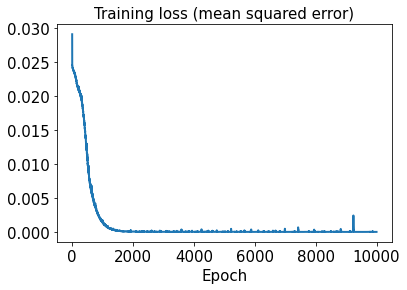

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

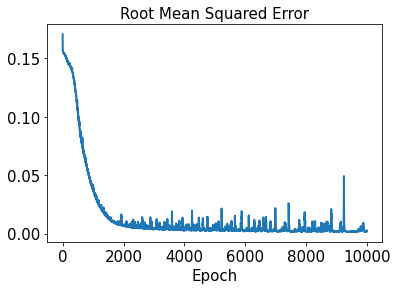

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.00016195816


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.0009761086


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

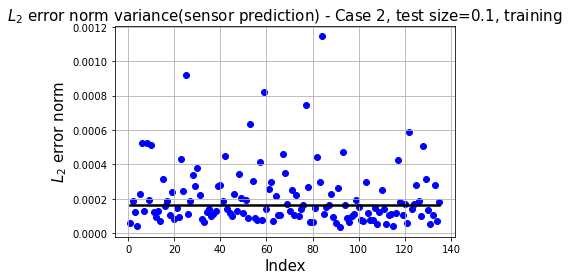

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

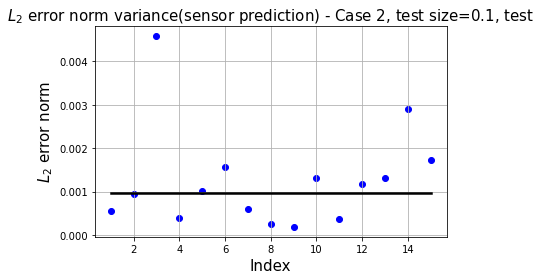

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.1052
Epoch 2/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.1050
Epoch 3/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.1047
Epoch 4/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.1044
Epoch 5/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 6/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1037
Epoch 7/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 8/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1025
Epoch 9/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1015
Epoch 10/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1002
Epoch 11/10000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 87/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 88/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0447
Epoch 89/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0441
Epoch 90/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 91/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 92/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0424
Epoch 93/10000
4/4 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0418
Epoch 94/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 95/10000
4/4 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 96/10000
4/4 [==============================] - 0

Epoch 169/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5659e-04 - rmse: 0.0199
Epoch 170/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5144e-04 - rmse: 0.0198
Epoch 171/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4552e-04 - rmse: 0.0196
Epoch 172/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4027e-04 - rmse: 0.0195
Epoch 173/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.3647e-04 - rmse: 0.0194
Epoch 174/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3164e-04 - rmse: 0.0193
Epoch 175/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2760e-04 - rmse: 0.0192
Epoch 176/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2436e-04 - rmse: 0.0191
Epoch 177/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1863e-04 - rmse: 0.0190
Epoch 178/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1513e-04 - rms

4/4 [==============================] - 0s 6ms/step - loss: 3.4112e-04 - rmse: 0.0136
Epoch 251/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3847e-04 - rmse: 0.0135
Epoch 252/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3722e-04 - rmse: 0.0134
Epoch 253/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3525e-04 - rmse: 0.0134
Epoch 254/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3443e-04 - rmse: 0.0133
Epoch 255/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3261e-04 - rmse: 0.0133
Epoch 256/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3061e-04 - rmse: 0.0132
Epoch 257/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2850e-04 - rmse: 0.0131
Epoch 258/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2839e-04 - rmse: 0.0131
Epoch 259/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2650e-04 - rmse: 0.0131
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 2.5335e-04 - rmse: 0.0100
Epoch 332/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5312e-04 - rmse: 0.0100
Epoch 333/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5213e-04 - rmse: 0.0100
Epoch 334/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5153e-04 - rmse: 0.0100
Epoch 335/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5087e-04 - rmse: 0.0099
Epoch 336/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4977e-04 - rmse: 0.0099
Epoch 337/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4972e-04 - rmse: 0.0099
Epoch 338/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4855e-04 - rmse: 0.0098
Epoch 339/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4874e-04 - rmse: 0.0098
Epoch 340/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4804e-04 - rmse: 0.0098
Epoch 

4/4 [==============================] - 0s 5ms/step - loss: 2.1353e-04 - rmse: 0.0081
Epoch 413/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1339e-04 - rmse: 0.0081
Epoch 414/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1336e-04 - rmse: 0.0081
Epoch 415/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1305e-04 - rmse: 0.0081
Epoch 416/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1264e-04 - rmse: 0.0081
Epoch 417/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1207e-04 - rmse: 0.0080
Epoch 418/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1163e-04 - rmse: 0.0080
Epoch 419/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1151e-04 - rmse: 0.0080
Epoch 420/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1117e-04 - rmse: 0.0080
Epoch 421/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1083e-04 - rmse: 0.0080
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.9041e-04 - rmse: 0.0069
Epoch 494/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8979e-04 - rmse: 0.0069
Epoch 495/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8962e-04 - rmse: 0.0069
Epoch 496/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8931e-04 - rmse: 0.0068
Epoch 497/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8878e-04 - rmse: 0.0068
Epoch 498/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8896e-04 - rmse: 0.0068
Epoch 499/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8857e-04 - rmse: 0.0068
Epoch 500/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8811e-04 - rmse: 0.0068
Epoch 501/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8820e-04 - rmse: 0.0068
Epoch 502/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8818e-04 - rmse: 0.0068
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.7399e-04 - rmse: 0.0060
Epoch 575/10000
4/4 [==============================] - 0s 7ms/step - loss: 1.7384e-04 - rmse: 0.0060
Epoch 576/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7374e-04 - rmse: 0.0060
Epoch 577/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7344e-04 - rmse: 0.0060
Epoch 578/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7312e-04 - rmse: 0.0060
Epoch 579/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7282e-04 - rmse: 0.0060
Epoch 580/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7269e-04 - rmse: 0.0060
Epoch 581/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7266e-04 - rmse: 0.0060
Epoch 582/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7244e-04 - rmse: 0.0060
Epoch 583/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7237e-04 - rmse: 0.0060
Epoch 

4/4 [==============================] - 0s 5ms/step - loss: 1.6064e-04 - rmse: 0.0053
Epoch 656/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6042e-04 - rmse: 0.0053
Epoch 657/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6052e-04 - rmse: 0.0053
Epoch 658/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6039e-04 - rmse: 0.0053
Epoch 659/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6001e-04 - rmse: 0.0053
Epoch 660/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6004e-04 - rmse: 0.0053
Epoch 661/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5984e-04 - rmse: 0.0053
Epoch 662/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5980e-04 - rmse: 0.0053
Epoch 663/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5969e-04 - rmse: 0.0053
Epoch 664/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5959e-04 - rmse: 0.0053
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.5014e-04 - rmse: 0.0048
Epoch 737/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4995e-04 - rmse: 0.0048
Epoch 738/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4951e-04 - rmse: 0.0048
Epoch 739/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4959e-04 - rmse: 0.0048
Epoch 740/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4926e-04 - rmse: 0.0047
Epoch 741/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4913e-04 - rmse: 0.0047
Epoch 742/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4893e-04 - rmse: 0.0047
Epoch 743/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4887e-04 - rmse: 0.0047
Epoch 744/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4878e-04 - rmse: 0.0047
Epoch 745/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4870e-04 - rmse: 0.0047
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.4060e-04 - rmse: 0.0043
Epoch 818/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4064e-04 - rmse: 0.0043
Epoch 819/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4052e-04 - rmse: 0.0043
Epoch 820/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4028e-04 - rmse: 0.0043
Epoch 821/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4011e-04 - rmse: 0.0043
Epoch 822/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4006e-04 - rmse: 0.0043
Epoch 823/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4005e-04 - rmse: 0.0043
Epoch 824/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3987e-04 - rmse: 0.0043
Epoch 825/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3986e-04 - rmse: 0.0043
Epoch 826/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3956e-04 - rmse: 0.0043
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.3250e-04 - rmse: 0.0040
Epoch 899/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3252e-04 - rmse: 0.0040
Epoch 900/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3241e-04 - rmse: 0.0040
Epoch 901/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3221e-04 - rmse: 0.0040
Epoch 902/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3209e-04 - rmse: 0.0039
Epoch 903/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3198e-04 - rmse: 0.0039
Epoch 904/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.3178e-04 - rmse: 0.0039
Epoch 905/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3179e-04 - rmse: 0.0039
Epoch 906/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3161e-04 - rmse: 0.0039
Epoch 907/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.3160e-04 - rmse: 0.0039
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.2527e-04 - rmse: 0.0037
Epoch 980/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2519e-04 - rmse: 0.0037
Epoch 981/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2504e-04 - rmse: 0.0037
Epoch 982/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2508e-04 - rmse: 0.0037
Epoch 983/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2494e-04 - rmse: 0.0037
Epoch 984/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2470e-04 - rmse: 0.0036
Epoch 985/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2471e-04 - rmse: 0.0036
Epoch 986/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2467e-04 - rmse: 0.0036
Epoch 987/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.2454e-04 - rmse: 0.0036
Epoch 988/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.2435e-04 - rmse: 0.0036
Epoch 

4/4 [==============================] - 0s 6ms/step - loss: 1.1862e-04 - rmse: 0.0034
Epoch 1060/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1856e-04 - rmse: 0.0034
Epoch 1061/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1845e-04 - rmse: 0.0034
Epoch 1062/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1845e-04 - rmse: 0.0034
Epoch 1063/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1841e-04 - rmse: 0.0034
Epoch 1064/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1825e-04 - rmse: 0.0034
Epoch 1065/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1827e-04 - rmse: 0.0034
Epoch 1066/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1810e-04 - rmse: 0.0034
Epoch 1067/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1804e-04 - rmse: 0.0034
Epoch 1068/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1800e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.1258e-04 - rmse: 0.0032
Epoch 1140/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1260e-04 - rmse: 0.0032
Epoch 1141/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1262e-04 - rmse: 0.0032
Epoch 1142/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.1246e-04 - rmse: 0.0032
Epoch 1143/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1233e-04 - rmse: 0.0032
Epoch 1144/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1237e-04 - rmse: 0.0032
Epoch 1145/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1230e-04 - rmse: 0.0032
Epoch 1146/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1215e-04 - rmse: 0.0032
Epoch 1147/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1209e-04 - rmse: 0.0032
Epoch 1148/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.1207e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0698e-04 - rmse: 0.0030
Epoch 1220/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0691e-04 - rmse: 0.0030
Epoch 1221/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0681e-04 - rmse: 0.0030
Epoch 1222/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0672e-04 - rmse: 0.0030
Epoch 1223/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0666e-04 - rmse: 0.0030
Epoch 1224/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0650e-04 - rmse: 0.0030
Epoch 1225/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0651e-04 - rmse: 0.0030
Epoch 1226/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0639e-04 - rmse: 0.0030
Epoch 1227/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0631e-04 - rmse: 0.0030
Epoch 1228/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0615e-04 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.0199e-04 - rmse: 0.0029
Epoch 1300/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0210e-04 - rmse: 0.0029
Epoch 1301/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0194e-04 - rmse: 0.0029
Epoch 1302/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0175e-04 - rmse: 0.0029
Epoch 1303/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0163e-04 - rmse: 0.0029
Epoch 1304/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.0150e-04 - rmse: 0.0029
Epoch 1305/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0140e-04 - rmse: 0.0029
Epoch 1306/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0156e-04 - rmse: 0.0029
Epoch 1307/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0141e-04 - rmse: 0.0029
Epoch 1308/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.0134e-04 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.6958e-05 - rmse: 0.0027
Epoch 1380/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6955e-05 - rmse: 0.0027
Epoch 1381/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6802e-05 - rmse: 0.0027
Epoch 1382/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6875e-05 - rmse: 0.0028
Epoch 1383/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6765e-05 - rmse: 0.0027
Epoch 1384/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6613e-05 - rmse: 0.0027
Epoch 1385/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6499e-05 - rmse: 0.0027
Epoch 1386/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6403e-05 - rmse: 0.0027
Epoch 1387/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.6432e-05 - rmse: 0.0027
Epoch 1388/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.6321e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 9.2289e-05 - rmse: 0.0026
Epoch 1460/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2298e-05 - rmse: 0.0026
Epoch 1461/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2290e-05 - rmse: 0.0026
Epoch 1462/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2293e-05 - rmse: 0.0026
Epoch 1463/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2196e-05 - rmse: 0.0026
Epoch 1464/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2285e-05 - rmse: 0.0026
Epoch 1465/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.2190e-05 - rmse: 0.0026
Epoch 1466/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2172e-05 - rmse: 0.0026
Epoch 1467/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2088e-05 - rmse: 0.0026
Epoch 1468/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1978e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.8030e-05 - rmse: 0.0025
Epoch 1540/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8075e-05 - rmse: 0.0025
Epoch 1541/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.8031e-05 - rmse: 0.0025
Epoch 1542/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7942e-05 - rmse: 0.0025
Epoch 1543/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7852e-05 - rmse: 0.0025
Epoch 1544/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7802e-05 - rmse: 0.0025
Epoch 1545/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7831e-05 - rmse: 0.0025
Epoch 1546/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7752e-05 - rmse: 0.0025
Epoch 1547/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7780e-05 - rmse: 0.0025
Epoch 1548/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7738e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.4115e-05 - rmse: 0.0024
Epoch 1620/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4095e-05 - rmse: 0.0024
Epoch 1621/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4269e-05 - rmse: 0.0024
Epoch 1622/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4287e-05 - rmse: 0.0025
Epoch 1623/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4050e-05 - rmse: 0.0024
Epoch 1624/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4027e-05 - rmse: 0.0024
Epoch 1625/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.3807e-05 - rmse: 0.0024
Epoch 1626/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.3785e-05 - rmse: 0.0024
Epoch 1627/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3886e-05 - rmse: 0.0024
Epoch 1628/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3799e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 8.0293e-05 - rmse: 0.0023
Epoch 1700/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0277e-05 - rmse: 0.0023
Epoch 1701/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0180e-05 - rmse: 0.0023
Epoch 1702/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0129e-05 - rmse: 0.0023
Epoch 1703/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0067e-05 - rmse: 0.0023
Epoch 1704/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0061e-05 - rmse: 0.0023
Epoch 1705/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0135e-05 - rmse: 0.0023
Epoch 1706/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0065e-05 - rmse: 0.0023
Epoch 1707/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0049e-05 - rmse: 0.0023
Epoch 1708/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0005e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.7005e-05 - rmse: 0.0022
Epoch 1780/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6932e-05 - rmse: 0.0022
Epoch 1781/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.7019e-05 - rmse: 0.0023
Epoch 1782/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6881e-05 - rmse: 0.0022
Epoch 1783/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6843e-05 - rmse: 0.0022
Epoch 1784/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6919e-05 - rmse: 0.0023
Epoch 1785/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6785e-05 - rmse: 0.0022
Epoch 1786/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6699e-05 - rmse: 0.0022
Epoch 1787/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.6657e-05 - rmse: 0.0022
Epoch 1788/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6558e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.3745e-05 - rmse: 0.0022
Epoch 1860/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3674e-05 - rmse: 0.0022
Epoch 1861/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3625e-05 - rmse: 0.0021
Epoch 1862/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3579e-05 - rmse: 0.0021
Epoch 1863/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3556e-05 - rmse: 0.0021
Epoch 1864/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3543e-05 - rmse: 0.0022
Epoch 1865/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3535e-05 - rmse: 0.0022
Epoch 1866/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.3433e-05 - rmse: 0.0021
Epoch 1867/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3430e-05 - rmse: 0.0022
Epoch 1868/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.3356e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 7.1002e-05 - rmse: 0.0022
Epoch 1940/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1088e-05 - rmse: 0.0022
Epoch 1941/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.1129e-05 - rmse: 0.0022
Epoch 1942/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0967e-05 - rmse: 0.0022
Epoch 1943/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0867e-05 - rmse: 0.0022
Epoch 1944/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0716e-05 - rmse: 0.0021
Epoch 1945/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0633e-05 - rmse: 0.0021
Epoch 1946/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0525e-05 - rmse: 0.0021
Epoch 1947/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.0430e-05 - rmse: 0.0021
Epoch 1948/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.0386e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 6.7799e-05 - rmse: 0.0020
Epoch 2020/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7798e-05 - rmse: 0.0020
Epoch 2021/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7846e-05 - rmse: 0.0020
Epoch 2022/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7725e-05 - rmse: 0.0020
Epoch 2023/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7741e-05 - rmse: 0.0020
Epoch 2024/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7684e-05 - rmse: 0.0020
Epoch 2025/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7664e-05 - rmse: 0.0020
Epoch 2026/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7621e-05 - rmse: 0.0020
Epoch 2027/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.7644e-05 - rmse: 0.0020
Epoch 2028/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.7575e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.5165e-05 - rmse: 0.0020
Epoch 2100/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5151e-05 - rmse: 0.0020
Epoch 2101/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5105e-05 - rmse: 0.0020
Epoch 2102/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5038e-05 - rmse: 0.0020
Epoch 2103/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5020e-05 - rmse: 0.0020
Epoch 2104/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5080e-05 - rmse: 0.0020
Epoch 2105/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.5023e-05 - rmse: 0.0020
Epoch 2106/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5002e-05 - rmse: 0.0020
Epoch 2107/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.5021e-05 - rmse: 0.0020
Epoch 2108/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.4957e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 6.2712e-05 - rmse: 0.0019
Epoch 2180/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2648e-05 - rmse: 0.0019
Epoch 2181/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2584e-05 - rmse: 0.0019
Epoch 2182/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2562e-05 - rmse: 0.0019
Epoch 2183/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2519e-05 - rmse: 0.0019
Epoch 2184/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2486e-05 - rmse: 0.0019
Epoch 2185/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.2481e-05 - rmse: 0.0019
Epoch 2186/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2430e-05 - rmse: 0.0019
Epoch 2187/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2414e-05 - rmse: 0.0019
Epoch 2188/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.2395e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 6.0274e-05 - rmse: 0.0019
Epoch 2260/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0285e-05 - rmse: 0.0019
Epoch 2261/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0251e-05 - rmse: 0.0019
Epoch 2262/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0210e-05 - rmse: 0.0019
Epoch 2263/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0174e-05 - rmse: 0.0019
Epoch 2264/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0115e-05 - rmse: 0.0019
Epoch 2265/10000
4/4 [==============================] - 0s 6ms/step - loss: 6.0086e-05 - rmse: 0.0019
Epoch 2266/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0064e-05 - rmse: 0.0019
Epoch 2267/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0028e-05 - rmse: 0.0019
Epoch 2268/10000
4/4 [==============================] - 0s 5ms/step - loss: 6.0019e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.8169e-05 - rmse: 0.0019
Epoch 2340/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8169e-05 - rmse: 0.0019
Epoch 2341/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8091e-05 - rmse: 0.0019
Epoch 2342/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8243e-05 - rmse: 0.0019
Epoch 2343/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8115e-05 - rmse: 0.0019
Epoch 2344/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8011e-05 - rmse: 0.0019
Epoch 2345/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.7933e-05 - rmse: 0.0018
Epoch 2346/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.8007e-05 - rmse: 0.0019
Epoch 2347/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8051e-05 - rmse: 0.0019
Epoch 2348/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.8002e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.6031e-05 - rmse: 0.0018
Epoch 2420/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.6053e-05 - rmse: 0.0018
Epoch 2421/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5917e-05 - rmse: 0.0018
Epoch 2422/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5898e-05 - rmse: 0.0018
Epoch 2423/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5910e-05 - rmse: 0.0018
Epoch 2424/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5844e-05 - rmse: 0.0018
Epoch 2425/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5867e-05 - rmse: 0.0018
Epoch 2426/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5839e-05 - rmse: 0.0018
Epoch 2427/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.5860e-05 - rmse: 0.0018
Epoch 2428/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.5751e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.4197e-05 - rmse: 0.0018
Epoch 2500/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.4133e-05 - rmse: 0.0018
Epoch 2501/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4050e-05 - rmse: 0.0018
Epoch 2502/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.4067e-05 - rmse: 0.0018
Epoch 2503/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3961e-05 - rmse: 0.0018
Epoch 2504/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3935e-05 - rmse: 0.0018
Epoch 2505/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3850e-05 - rmse: 0.0018
Epoch 2506/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3836e-05 - rmse: 0.0018
Epoch 2507/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3805e-05 - rmse: 0.0018
Epoch 2508/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.3784e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 5.2115e-05 - rmse: 0.0017
Epoch 2580/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2101e-05 - rmse: 0.0017
Epoch 2581/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2045e-05 - rmse: 0.0017
Epoch 2582/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2052e-05 - rmse: 0.0017
Epoch 2583/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.2023e-05 - rmse: 0.0017
Epoch 2584/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.2015e-05 - rmse: 0.0017
Epoch 2585/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1976e-05 - rmse: 0.0017
Epoch 2586/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1973e-05 - rmse: 0.0017
Epoch 2587/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.1977e-05 - rmse: 0.0017
Epoch 2588/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.1914e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 5.0590e-05 - rmse: 0.0018
Epoch 2660/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0836e-05 - rmse: 0.0018
Epoch 2661/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0775e-05 - rmse: 0.0018
Epoch 2662/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0805e-05 - rmse: 0.0018
Epoch 2663/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0604e-05 - rmse: 0.0018
Epoch 2664/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0618e-05 - rmse: 0.0018
Epoch 2665/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0524e-05 - rmse: 0.0018
Epoch 2666/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0587e-05 - rmse: 0.0018
Epoch 2667/10000
4/4 [==============================] - 0s 5ms/step - loss: 5.0567e-05 - rmse: 0.0018
Epoch 2668/10000
4/4 [==============================] - 0s 6ms/step - loss: 5.0524e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.8842e-05 - rmse: 0.0017
Epoch 2740/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8779e-05 - rmse: 0.0017
Epoch 2741/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8769e-05 - rmse: 0.0017
Epoch 2742/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8730e-05 - rmse: 0.0017
Epoch 2743/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8688e-05 - rmse: 0.0017
Epoch 2744/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8632e-05 - rmse: 0.0017
Epoch 2745/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8679e-05 - rmse: 0.0017
Epoch 2746/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8710e-05 - rmse: 0.0017
Epoch 2747/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8659e-05 - rmse: 0.0017
Epoch 2748/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.8700e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.7114e-05 - rmse: 0.0016
Epoch 2820/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7121e-05 - rmse: 0.0016
Epoch 2821/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7107e-05 - rmse: 0.0016
Epoch 2822/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7139e-05 - rmse: 0.0017
Epoch 2823/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7196e-05 - rmse: 0.0017
Epoch 2824/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7138e-05 - rmse: 0.0017
Epoch 2825/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7097e-05 - rmse: 0.0017
Epoch 2826/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.7103e-05 - rmse: 0.0017
Epoch 2827/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.7015e-05 - rmse: 0.0016
Epoch 2828/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.6990e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.5762e-05 - rmse: 0.0017
Epoch 2900/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5666e-05 - rmse: 0.0016
Epoch 2901/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5578e-05 - rmse: 0.0016
Epoch 2902/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5580e-05 - rmse: 0.0016
Epoch 2903/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5559e-05 - rmse: 0.0016
Epoch 2904/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.5512e-05 - rmse: 0.0016
Epoch 2905/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5518e-05 - rmse: 0.0016
Epoch 2906/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5524e-05 - rmse: 0.0016
Epoch 2907/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5475e-05 - rmse: 0.0016
Epoch 2908/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.5500e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.4246e-05 - rmse: 0.0016
Epoch 2980/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4235e-05 - rmse: 0.0016
Epoch 2981/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4255e-05 - rmse: 0.0016
Epoch 2982/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4256e-05 - rmse: 0.0016
Epoch 2983/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4220e-05 - rmse: 0.0016
Epoch 2984/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4237e-05 - rmse: 0.0016
Epoch 2985/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4200e-05 - rmse: 0.0016
Epoch 2986/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.4163e-05 - rmse: 0.0016
Epoch 2987/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4135e-05 - rmse: 0.0016
Epoch 2988/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.4048e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.2935e-05 - rmse: 0.0016
Epoch 3060/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2959e-05 - rmse: 0.0016
Epoch 3061/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2914e-05 - rmse: 0.0016
Epoch 3062/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2878e-05 - rmse: 0.0016
Epoch 3063/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2852e-05 - rmse: 0.0016
Epoch 3064/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2810e-05 - rmse: 0.0016
Epoch 3065/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2884e-05 - rmse: 0.0016
Epoch 3066/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.2850e-05 - rmse: 0.0016
Epoch 3067/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2828e-05 - rmse: 0.0016
Epoch 3068/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.2851e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 4.1930e-05 - rmse: 0.0016
Epoch 3140/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1878e-05 - rmse: 0.0016
Epoch 3141/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1783e-05 - rmse: 0.0016
Epoch 3142/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1771e-05 - rmse: 0.0016
Epoch 3143/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1749e-05 - rmse: 0.0016
Epoch 3144/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1733e-05 - rmse: 0.0016
Epoch 3145/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1723e-05 - rmse: 0.0016
Epoch 3146/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.1625e-05 - rmse: 0.0016
Epoch 3147/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1674e-05 - rmse: 0.0016
Epoch 3148/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.1630e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 4.0545e-05 - rmse: 0.0016
Epoch 3220/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0603e-05 - rmse: 0.0016
Epoch 3221/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0537e-05 - rmse: 0.0016
Epoch 3222/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0593e-05 - rmse: 0.0016
Epoch 3223/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0538e-05 - rmse: 0.0016
Epoch 3224/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0559e-05 - rmse: 0.0016
Epoch 3225/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0685e-05 - rmse: 0.0016
Epoch 3226/10000
4/4 [==============================] - 0s 5ms/step - loss: 4.0736e-05 - rmse: 0.0017
Epoch 3227/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0643e-05 - rmse: 0.0016
Epoch 3228/10000
4/4 [==============================] - 0s 6ms/step - loss: 4.0821e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.9412e-05 - rmse: 0.0015
Epoch 3300/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9390e-05 - rmse: 0.0015
Epoch 3301/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9405e-05 - rmse: 0.0015
Epoch 3302/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9439e-05 - rmse: 0.0016
Epoch 3303/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9362e-05 - rmse: 0.0015
Epoch 3304/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.9335e-05 - rmse: 0.0015
Epoch 3305/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9396e-05 - rmse: 0.0016
Epoch 3306/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9408e-05 - rmse: 0.0016
Epoch 3307/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9350e-05 - rmse: 0.0016
Epoch 3308/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.9326e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 3.8298e-05 - rmse: 0.0015
Epoch 3380/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.8240e-05 - rmse: 0.0015
Epoch 3381/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8247e-05 - rmse: 0.0015
Epoch 3382/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8219e-05 - rmse: 0.0015
Epoch 3383/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.8255e-05 - rmse: 0.0015
Epoch 3384/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8209e-05 - rmse: 0.0015
Epoch 3385/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.8179e-05 - rmse: 0.0015
Epoch 3386/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.8266e-05 - rmse: 0.0015
Epoch 3387/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8220e-05 - rmse: 0.0015
Epoch 3388/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.8170e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.7245e-05 - rmse: 0.0015
Epoch 3460/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7238e-05 - rmse: 0.0015
Epoch 3461/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7268e-05 - rmse: 0.0015
Epoch 3462/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7252e-05 - rmse: 0.0015
Epoch 3463/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7237e-05 - rmse: 0.0015
Epoch 3464/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7154e-05 - rmse: 0.0015
Epoch 3465/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7297e-05 - rmse: 0.0015
Epoch 3466/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7255e-05 - rmse: 0.0015
Epoch 3467/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.7500e-05 - rmse: 0.0016
Epoch 3468/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.7350e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.6353e-05 - rmse: 0.0015
Epoch 3540/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6270e-05 - rmse: 0.0015
Epoch 3541/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6191e-05 - rmse: 0.0014
Epoch 3542/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6251e-05 - rmse: 0.0015
Epoch 3543/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6248e-05 - rmse: 0.0015
Epoch 3544/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6212e-05 - rmse: 0.0015
Epoch 3545/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.6172e-05 - rmse: 0.0014
Epoch 3546/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6178e-05 - rmse: 0.0014
Epoch 3547/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6155e-05 - rmse: 0.0014
Epoch 3548/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.6184e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.5461e-05 - rmse: 0.0015
Epoch 3620/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5455e-05 - rmse: 0.0015
Epoch 3621/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5395e-05 - rmse: 0.0015
Epoch 3622/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5437e-05 - rmse: 0.0015
Epoch 3623/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5359e-05 - rmse: 0.0014
Epoch 3624/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5351e-05 - rmse: 0.0015
Epoch 3625/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5354e-05 - rmse: 0.0015
Epoch 3626/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5319e-05 - rmse: 0.0014
Epoch 3627/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.5334e-05 - rmse: 0.0015
Epoch 3628/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.5345e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.4694e-05 - rmse: 0.0015
Epoch 3700/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4645e-05 - rmse: 0.0015
Epoch 3701/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4649e-05 - rmse: 0.0015
Epoch 3702/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4673e-05 - rmse: 0.0015
Epoch 3703/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.4615e-05 - rmse: 0.0015
Epoch 3704/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4643e-05 - rmse: 0.0015
Epoch 3705/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4656e-05 - rmse: 0.0015
Epoch 3706/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4639e-05 - rmse: 0.0015
Epoch 3707/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4577e-05 - rmse: 0.0015
Epoch 3708/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.4553e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 3.3823e-05 - rmse: 0.0015
Epoch 3780/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3717e-05 - rmse: 0.0014
Epoch 3781/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3714e-05 - rmse: 0.0014
Epoch 3782/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3648e-05 - rmse: 0.0014
Epoch 3783/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3619e-05 - rmse: 0.0014
Epoch 3784/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3596e-05 - rmse: 0.0014
Epoch 3785/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3593e-05 - rmse: 0.0014
Epoch 3786/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3645e-05 - rmse: 0.0014
Epoch 3787/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3634e-05 - rmse: 0.0014
Epoch 3788/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.3627e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.2912e-05 - rmse: 0.0014
Epoch 3860/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2871e-05 - rmse: 0.0014
Epoch 3861/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2880e-05 - rmse: 0.0014
Epoch 3862/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2863e-05 - rmse: 0.0014
Epoch 3863/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2867e-05 - rmse: 0.0014
Epoch 3864/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2871e-05 - rmse: 0.0014
Epoch 3865/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2877e-05 - rmse: 0.0014
Epoch 3866/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.3003e-05 - rmse: 0.0015
Epoch 3867/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2987e-05 - rmse: 0.0015
Epoch 3868/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2873e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.2178e-05 - rmse: 0.0014
Epoch 3940/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2286e-05 - rmse: 0.0014
Epoch 3941/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2245e-05 - rmse: 0.0014
Epoch 3942/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2204e-05 - rmse: 0.0014
Epoch 3943/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2169e-05 - rmse: 0.0014
Epoch 3944/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2190e-05 - rmse: 0.0014
Epoch 3945/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2272e-05 - rmse: 0.0014
Epoch 3946/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2428e-05 - rmse: 0.0015
Epoch 3947/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.2272e-05 - rmse: 0.0015
Epoch 3948/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.2215e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.1436e-05 - rmse: 0.0014
Epoch 4020/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1428e-05 - rmse: 0.0014
Epoch 4021/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.1367e-05 - rmse: 0.0014
Epoch 4022/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1371e-05 - rmse: 0.0014
Epoch 4023/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1346e-05 - rmse: 0.0014
Epoch 4024/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1404e-05 - rmse: 0.0014
Epoch 4025/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1399e-05 - rmse: 0.0014
Epoch 4026/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1363e-05 - rmse: 0.0014
Epoch 4027/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.1369e-05 - rmse: 0.0014
Epoch 4028/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.1363e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.0825e-05 - rmse: 0.0014
Epoch 4100/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0802e-05 - rmse: 0.0014
Epoch 4101/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0719e-05 - rmse: 0.0014
Epoch 4102/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0672e-05 - rmse: 0.0013
Epoch 4103/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0656e-05 - rmse: 0.0013
Epoch 4104/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0631e-05 - rmse: 0.0013
Epoch 4105/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0648e-05 - rmse: 0.0013
Epoch 4106/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0692e-05 - rmse: 0.0014
Epoch 4107/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0671e-05 - rmse: 0.0014
Epoch 4108/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0689e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 3.0078e-05 - rmse: 0.0013
Epoch 4180/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0080e-05 - rmse: 0.0013
Epoch 4181/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0166e-05 - rmse: 0.0014
Epoch 4182/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0182e-05 - rmse: 0.0014
Epoch 4183/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0160e-05 - rmse: 0.0014
Epoch 4184/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0120e-05 - rmse: 0.0014
Epoch 4185/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0115e-05 - rmse: 0.0014
Epoch 4186/10000
4/4 [==============================] - 0s 6ms/step - loss: 3.0049e-05 - rmse: 0.0013
Epoch 4187/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0064e-05 - rmse: 0.0014
Epoch 4188/10000
4/4 [==============================] - 0s 5ms/step - loss: 3.0120e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.9468e-05 - rmse: 0.0013
Epoch 4260/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9433e-05 - rmse: 0.0013
Epoch 4261/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9478e-05 - rmse: 0.0013
Epoch 4262/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9525e-05 - rmse: 0.0014
Epoch 4263/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9490e-05 - rmse: 0.0014
Epoch 4264/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.9439e-05 - rmse: 0.0013
Epoch 4265/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9395e-05 - rmse: 0.0013
Epoch 4266/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9491e-05 - rmse: 0.0014
Epoch 4267/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9418e-05 - rmse: 0.0013
Epoch 4268/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9579e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.9188e-05 - rmse: 0.0014
Epoch 4340/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9555e-05 - rmse: 0.0016
Epoch 4341/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9714e-05 - rmse: 0.0016
Epoch 4342/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.9560e-05 - rmse: 0.0016
Epoch 4343/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9702e-05 - rmse: 0.0016
Epoch 4344/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9632e-05 - rmse: 0.0016
Epoch 4345/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.9606e-05 - rmse: 0.0016
Epoch 4346/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9488e-05 - rmse: 0.0016
Epoch 4347/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9245e-05 - rmse: 0.0015
Epoch 4348/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.9198e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.8318e-05 - rmse: 0.0013
Epoch 4420/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8305e-05 - rmse: 0.0013
Epoch 4421/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.8294e-05 - rmse: 0.0013
Epoch 4422/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.8266e-05 - rmse: 0.0013
Epoch 4423/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8250e-05 - rmse: 0.0013
Epoch 4424/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8214e-05 - rmse: 0.0013
Epoch 4425/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8196e-05 - rmse: 0.0013
Epoch 4426/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8179e-05 - rmse: 0.0013
Epoch 4427/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.8210e-05 - rmse: 0.0013
Epoch 4428/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.8206e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.7761e-05 - rmse: 0.0013
Epoch 4500/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7720e-05 - rmse: 0.0013
Epoch 4501/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7722e-05 - rmse: 0.0013
Epoch 4502/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7708e-05 - rmse: 0.0013
Epoch 4503/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7788e-05 - rmse: 0.0013
Epoch 4504/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7738e-05 - rmse: 0.0013
Epoch 4505/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7759e-05 - rmse: 0.0013
Epoch 4506/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7739e-05 - rmse: 0.0013
Epoch 4507/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7779e-05 - rmse: 0.0013
Epoch 4508/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7872e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.7521e-05 - rmse: 0.0014
Epoch 4580/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7396e-05 - rmse: 0.0013
Epoch 4581/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7390e-05 - rmse: 0.0013
Epoch 4582/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7388e-05 - rmse: 0.0013
Epoch 4583/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7283e-05 - rmse: 0.0013
Epoch 4584/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7299e-05 - rmse: 0.0013
Epoch 4585/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7329e-05 - rmse: 0.0013
Epoch 4586/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.7272e-05 - rmse: 0.0013
Epoch 4587/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7248e-05 - rmse: 0.0013
Epoch 4588/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.7247e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.6806e-05 - rmse: 0.0013
Epoch 4660/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6767e-05 - rmse: 0.0013
Epoch 4661/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6788e-05 - rmse: 0.0013
Epoch 4662/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6745e-05 - rmse: 0.0013
Epoch 4663/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6773e-05 - rmse: 0.0013
Epoch 4664/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6741e-05 - rmse: 0.0013
Epoch 4665/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6728e-05 - rmse: 0.0013
Epoch 4666/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6700e-05 - rmse: 0.0013
Epoch 4667/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6738e-05 - rmse: 0.0013
Epoch 4668/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6708e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.6409e-05 - rmse: 0.0013
Epoch 4740/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6385e-05 - rmse: 0.0013
Epoch 4741/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6355e-05 - rmse: 0.0013
Epoch 4742/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6339e-05 - rmse: 0.0013
Epoch 4743/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6302e-05 - rmse: 0.0013
Epoch 4744/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6374e-05 - rmse: 0.0013
Epoch 4745/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6344e-05 - rmse: 0.0013
Epoch 4746/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6370e-05 - rmse: 0.0013
Epoch 4747/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6322e-05 - rmse: 0.0013
Epoch 4748/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6377e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.5868e-05 - rmse: 0.0013
Epoch 4820/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5865e-05 - rmse: 0.0013
Epoch 4821/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5927e-05 - rmse: 0.0013
Epoch 4822/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6075e-05 - rmse: 0.0014
Epoch 4823/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.6048e-05 - rmse: 0.0013
Epoch 4824/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6050e-05 - rmse: 0.0013
Epoch 4825/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6048e-05 - rmse: 0.0013
Epoch 4826/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6091e-05 - rmse: 0.0014
Epoch 4827/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6187e-05 - rmse: 0.0014
Epoch 4828/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.6273e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.5552e-05 - rmse: 0.0013
Epoch 4900/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5428e-05 - rmse: 0.0013
Epoch 4901/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5466e-05 - rmse: 0.0013
Epoch 4902/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5510e-05 - rmse: 0.0013
Epoch 4903/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5415e-05 - rmse: 0.0013
Epoch 4904/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5358e-05 - rmse: 0.0012
Epoch 4905/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5351e-05 - rmse: 0.0012
Epoch 4906/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5340e-05 - rmse: 0.0012
Epoch 4907/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.5355e-05 - rmse: 0.0012
Epoch 4908/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5320e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.4950e-05 - rmse: 0.0012
Epoch 4980/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4945e-05 - rmse: 0.0012
Epoch 4981/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5028e-05 - rmse: 0.0013
Epoch 4982/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4994e-05 - rmse: 0.0012
Epoch 4983/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4979e-05 - rmse: 0.0012
Epoch 4984/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4969e-05 - rmse: 0.0012
Epoch 4985/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4961e-05 - rmse: 0.0012
Epoch 4986/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4958e-05 - rmse: 0.0012
Epoch 4987/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5062e-05 - rmse: 0.0013
Epoch 4988/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.5128e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.4683e-05 - rmse: 0.0013
Epoch 5060/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4657e-05 - rmse: 0.0013
Epoch 5061/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4764e-05 - rmse: 0.0013
Epoch 5062/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4769e-05 - rmse: 0.0013
Epoch 5063/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4756e-05 - rmse: 0.0013
Epoch 5064/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4699e-05 - rmse: 0.0013
Epoch 5065/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4612e-05 - rmse: 0.0013
Epoch 5066/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4527e-05 - rmse: 0.0012
Epoch 5067/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4496e-05 - rmse: 0.0012
Epoch 5068/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4561e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.4289e-05 - rmse: 0.0013
Epoch 5140/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4225e-05 - rmse: 0.0012
Epoch 5141/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4156e-05 - rmse: 0.0012
Epoch 5142/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4131e-05 - rmse: 0.0012
Epoch 5143/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4130e-05 - rmse: 0.0012
Epoch 5144/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4196e-05 - rmse: 0.0012
Epoch 5145/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4187e-05 - rmse: 0.0012
Epoch 5146/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4167e-05 - rmse: 0.0012
Epoch 5147/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.4130e-05 - rmse: 0.0012
Epoch 5148/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.4116e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.3768e-05 - rmse: 0.0012
Epoch 5220/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3829e-05 - rmse: 0.0012
Epoch 5221/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3796e-05 - rmse: 0.0012
Epoch 5222/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3808e-05 - rmse: 0.0012
Epoch 5223/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3801e-05 - rmse: 0.0012
Epoch 5224/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3777e-05 - rmse: 0.0012
Epoch 5225/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3789e-05 - rmse: 0.0012
Epoch 5226/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3812e-05 - rmse: 0.0012
Epoch 5227/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3864e-05 - rmse: 0.0013
Epoch 5228/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3794e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.3493e-05 - rmse: 0.0012
Epoch 5300/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3409e-05 - rmse: 0.0012
Epoch 5301/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3395e-05 - rmse: 0.0012
Epoch 5302/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3360e-05 - rmse: 0.0012
Epoch 5303/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3399e-05 - rmse: 0.0012
Epoch 5304/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3399e-05 - rmse: 0.0012
Epoch 5305/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3337e-05 - rmse: 0.0012
Epoch 5306/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3360e-05 - rmse: 0.0012
Epoch 5307/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3356e-05 - rmse: 0.0012
Epoch 5308/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3461e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.3287e-05 - rmse: 0.0013
Epoch 5380/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3301e-05 - rmse: 0.0013
Epoch 5381/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3338e-05 - rmse: 0.0013
Epoch 5382/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3320e-05 - rmse: 0.0013
Epoch 5383/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3341e-05 - rmse: 0.0013
Epoch 5384/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3258e-05 - rmse: 0.0013
Epoch 5385/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3351e-05 - rmse: 0.0013
Epoch 5386/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.3413e-05 - rmse: 0.0013
Epoch 5387/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3406e-05 - rmse: 0.0013
Epoch 5388/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.3335e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.2795e-05 - rmse: 0.0012
Epoch 5460/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2811e-05 - rmse: 0.0012
Epoch 5461/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2856e-05 - rmse: 0.0012
Epoch 5462/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2906e-05 - rmse: 0.0013
Epoch 5463/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2858e-05 - rmse: 0.0012
Epoch 5464/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2865e-05 - rmse: 0.0012
Epoch 5465/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2800e-05 - rmse: 0.0012
Epoch 5466/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2818e-05 - rmse: 0.0012
Epoch 5467/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2902e-05 - rmse: 0.0013
Epoch 5468/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2844e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.2479e-05 - rmse: 0.0012
Epoch 5540/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2469e-05 - rmse: 0.0012
Epoch 5541/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2456e-05 - rmse: 0.0012
Epoch 5542/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2435e-05 - rmse: 0.0012
Epoch 5543/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2411e-05 - rmse: 0.0012
Epoch 5544/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2436e-05 - rmse: 0.0012
Epoch 5545/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2456e-05 - rmse: 0.0012
Epoch 5546/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2432e-05 - rmse: 0.0012
Epoch 5547/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2454e-05 - rmse: 0.0012
Epoch 5548/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2474e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.2152e-05 - rmse: 0.0012
Epoch 5620/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2102e-05 - rmse: 0.0012
Epoch 5621/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2087e-05 - rmse: 0.0012
Epoch 5622/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.2136e-05 - rmse: 0.0012
Epoch 5623/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2132e-05 - rmse: 0.0012
Epoch 5624/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2125e-05 - rmse: 0.0012
Epoch 5625/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2122e-05 - rmse: 0.0012
Epoch 5626/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2153e-05 - rmse: 0.0012
Epoch 5627/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2220e-05 - rmse: 0.0012
Epoch 5628/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.2144e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.1812e-05 - rmse: 0.0012
Epoch 5700/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1847e-05 - rmse: 0.0012
Epoch 5701/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1808e-05 - rmse: 0.0012
Epoch 5702/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1828e-05 - rmse: 0.0012
Epoch 5703/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1810e-05 - rmse: 0.0012
Epoch 5704/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1779e-05 - rmse: 0.0011
Epoch 5705/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1776e-05 - rmse: 0.0011
Epoch 5706/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1785e-05 - rmse: 0.0012
Epoch 5707/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1797e-05 - rmse: 0.0012
Epoch 5708/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1844e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.1561e-05 - rmse: 0.0012
Epoch 5780/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1531e-05 - rmse: 0.0011
Epoch 5781/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1534e-05 - rmse: 0.0012
Epoch 5782/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1660e-05 - rmse: 0.0012
Epoch 5783/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1588e-05 - rmse: 0.0012
Epoch 5784/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1588e-05 - rmse: 0.0012
Epoch 5785/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1578e-05 - rmse: 0.0012
Epoch 5786/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1583e-05 - rmse: 0.0012
Epoch 5787/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1577e-05 - rmse: 0.0012
Epoch 5788/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1540e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.1328e-05 - rmse: 0.0012
Epoch 5860/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1348e-05 - rmse: 0.0012
Epoch 5861/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1384e-05 - rmse: 0.0012
Epoch 5862/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1391e-05 - rmse: 0.0012
Epoch 5863/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1398e-05 - rmse: 0.0012
Epoch 5864/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1435e-05 - rmse: 0.0012
Epoch 5865/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1362e-05 - rmse: 0.0012
Epoch 5866/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1332e-05 - rmse: 0.0012
Epoch 5867/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1306e-05 - rmse: 0.0012
Epoch 5868/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1269e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.1174e-05 - rmse: 0.0012
Epoch 5940/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1149e-05 - rmse: 0.0012
Epoch 5941/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1040e-05 - rmse: 0.0012
Epoch 5942/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1115e-05 - rmse: 0.0012
Epoch 5943/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1116e-05 - rmse: 0.0012
Epoch 5944/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1062e-05 - rmse: 0.0012
Epoch 5945/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1106e-05 - rmse: 0.0012
Epoch 5946/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1118e-05 - rmse: 0.0012
Epoch 5947/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.1137e-05 - rmse: 0.0012
Epoch 5948/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.1096e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.0896e-05 - rmse: 0.0012
Epoch 6020/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0871e-05 - rmse: 0.0012
Epoch 6021/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0843e-05 - rmse: 0.0012
Epoch 6022/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0889e-05 - rmse: 0.0012
Epoch 6023/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0836e-05 - rmse: 0.0012
Epoch 6024/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0828e-05 - rmse: 0.0012
Epoch 6025/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0780e-05 - rmse: 0.0012
Epoch 6026/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0784e-05 - rmse: 0.0012
Epoch 6027/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0770e-05 - rmse: 0.0012
Epoch 6028/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0819e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.0504e-05 - rmse: 0.0011
Epoch 6100/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0542e-05 - rmse: 0.0011
Epoch 6101/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0544e-05 - rmse: 0.0011
Epoch 6102/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0478e-05 - rmse: 0.0011
Epoch 6103/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0466e-05 - rmse: 0.0011
Epoch 6104/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0490e-05 - rmse: 0.0011
Epoch 6105/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0506e-05 - rmse: 0.0011
Epoch 6106/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0459e-05 - rmse: 0.0011
Epoch 6107/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0420e-05 - rmse: 0.0011
Epoch 6108/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0427e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 2.0336e-05 - rmse: 0.0011
Epoch 6180/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0325e-05 - rmse: 0.0011
Epoch 6181/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0309e-05 - rmse: 0.0011
Epoch 6182/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0238e-05 - rmse: 0.0011
Epoch 6183/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0230e-05 - rmse: 0.0011
Epoch 6184/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0178e-05 - rmse: 0.0011
Epoch 6185/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0196e-05 - rmse: 0.0011
Epoch 6186/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0234e-05 - rmse: 0.0011
Epoch 6187/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0229e-05 - rmse: 0.0011
Epoch 6188/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0231e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 2.0107e-05 - rmse: 0.0011
Epoch 6260/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0015e-05 - rmse: 0.0011
Epoch 6261/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0023e-05 - rmse: 0.0011
Epoch 6262/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0025e-05 - rmse: 0.0011
Epoch 6263/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0019e-05 - rmse: 0.0011
Epoch 6264/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0017e-05 - rmse: 0.0011
Epoch 6265/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0075e-05 - rmse: 0.0011
Epoch 6266/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0091e-05 - rmse: 0.0011
Epoch 6267/10000
4/4 [==============================] - 0s 6ms/step - loss: 2.0083e-05 - rmse: 0.0011
Epoch 6268/10000
4/4 [==============================] - 0s 5ms/step - loss: 2.0082e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.9874e-05 - rmse: 0.0011
Epoch 6340/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9889e-05 - rmse: 0.0011
Epoch 6341/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9806e-05 - rmse: 0.0011
Epoch 6342/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9830e-05 - rmse: 0.0011
Epoch 6343/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9870e-05 - rmse: 0.0011
Epoch 6344/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9829e-05 - rmse: 0.0011
Epoch 6345/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9813e-05 - rmse: 0.0011
Epoch 6346/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9803e-05 - rmse: 0.0011
Epoch 6347/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9807e-05 - rmse: 0.0011
Epoch 6348/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9823e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.9807e-05 - rmse: 0.0012
Epoch 6420/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9852e-05 - rmse: 0.0012
Epoch 6421/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9913e-05 - rmse: 0.0012
Epoch 6422/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9846e-05 - rmse: 0.0012
Epoch 6423/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9849e-05 - rmse: 0.0012
Epoch 6424/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9783e-05 - rmse: 0.0012
Epoch 6425/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9665e-05 - rmse: 0.0011
Epoch 6426/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9647e-05 - rmse: 0.0011
Epoch 6427/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9642e-05 - rmse: 0.0011
Epoch 6428/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9638e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.9726e-05 - rmse: 0.0012
Epoch 6500/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9755e-05 - rmse: 0.0012
Epoch 6501/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9791e-05 - rmse: 0.0013
Epoch 6502/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9714e-05 - rmse: 0.0012
Epoch 6503/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9644e-05 - rmse: 0.0012
Epoch 6504/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9589e-05 - rmse: 0.0012
Epoch 6505/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9495e-05 - rmse: 0.0011
Epoch 6506/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9591e-05 - rmse: 0.0012
Epoch 6507/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9590e-05 - rmse: 0.0012
Epoch 6508/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9505e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.9179e-05 - rmse: 0.0011
Epoch 6580/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9190e-05 - rmse: 0.0011
Epoch 6581/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9193e-05 - rmse: 0.0011
Epoch 6582/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9206e-05 - rmse: 0.0011
Epoch 6583/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9156e-05 - rmse: 0.0011
Epoch 6584/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9172e-05 - rmse: 0.0011
Epoch 6585/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9190e-05 - rmse: 0.0011
Epoch 6586/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9146e-05 - rmse: 0.0011
Epoch 6587/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9113e-05 - rmse: 0.0011
Epoch 6588/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9122e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.9170e-05 - rmse: 0.0012
Epoch 6660/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9163e-05 - rmse: 0.0012
Epoch 6661/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9102e-05 - rmse: 0.0011
Epoch 6662/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9082e-05 - rmse: 0.0011
Epoch 6663/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.9007e-05 - rmse: 0.0011
Epoch 6664/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9015e-05 - rmse: 0.0011
Epoch 6665/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9058e-05 - rmse: 0.0011
Epoch 6666/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.9045e-05 - rmse: 0.0011
Epoch 6667/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8993e-05 - rmse: 0.0011
Epoch 6668/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8966e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.8799e-05 - rmse: 0.0011
Epoch 6740/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8801e-05 - rmse: 0.0011
Epoch 6741/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8799e-05 - rmse: 0.0011
Epoch 6742/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8791e-05 - rmse: 0.0011
Epoch 6743/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8782e-05 - rmse: 0.0011
Epoch 6744/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8783e-05 - rmse: 0.0011
Epoch 6745/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8810e-05 - rmse: 0.0011
Epoch 6746/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8825e-05 - rmse: 0.0011
Epoch 6747/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8960e-05 - rmse: 0.0011
Epoch 6748/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8963e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.8695e-05 - rmse: 0.0011
Epoch 6820/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8724e-05 - rmse: 0.0011
Epoch 6821/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8687e-05 - rmse: 0.0011
Epoch 6822/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8681e-05 - rmse: 0.0011
Epoch 6823/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8682e-05 - rmse: 0.0011
Epoch 6824/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8645e-05 - rmse: 0.0011
Epoch 6825/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8629e-05 - rmse: 0.0011
Epoch 6826/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8602e-05 - rmse: 0.0011
Epoch 6827/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8614e-05 - rmse: 0.0011
Epoch 6828/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8607e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.8514e-05 - rmse: 0.0011
Epoch 6900/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8519e-05 - rmse: 0.0011
Epoch 6901/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8535e-05 - rmse: 0.0011
Epoch 6902/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8560e-05 - rmse: 0.0011
Epoch 6903/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8537e-05 - rmse: 0.0011
Epoch 6904/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8548e-05 - rmse: 0.0011
Epoch 6905/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8520e-05 - rmse: 0.0011
Epoch 6906/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8514e-05 - rmse: 0.0011
Epoch 6907/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8526e-05 - rmse: 0.0011
Epoch 6908/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8533e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.8400e-05 - rmse: 0.0011
Epoch 6980/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8401e-05 - rmse: 0.0011
Epoch 6981/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8441e-05 - rmse: 0.0011
Epoch 6982/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8506e-05 - rmse: 0.0012
Epoch 6983/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8512e-05 - rmse: 0.0012
Epoch 6984/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8493e-05 - rmse: 0.0012
Epoch 6985/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8648e-05 - rmse: 0.0012
Epoch 6986/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8648e-05 - rmse: 0.0012
Epoch 6987/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8730e-05 - rmse: 0.0013
Epoch 6988/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8569e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.8155e-05 - rmse: 0.0011
Epoch 7060/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8183e-05 - rmse: 0.0011
Epoch 7061/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8137e-05 - rmse: 0.0011
Epoch 7062/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8223e-05 - rmse: 0.0011
Epoch 7063/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8227e-05 - rmse: 0.0011
Epoch 7064/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8180e-05 - rmse: 0.0011
Epoch 7065/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8165e-05 - rmse: 0.0011
Epoch 7066/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8156e-05 - rmse: 0.0011
Epoch 7067/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8138e-05 - rmse: 0.0011
Epoch 7068/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8154e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.8004e-05 - rmse: 0.0011
Epoch 7140/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7976e-05 - rmse: 0.0010
Epoch 7141/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7994e-05 - rmse: 0.0011
Epoch 7142/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7978e-05 - rmse: 0.0011
Epoch 7143/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7981e-05 - rmse: 0.0011
Epoch 7144/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7975e-05 - rmse: 0.0011
Epoch 7145/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8104e-05 - rmse: 0.0011
Epoch 7146/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8108e-05 - rmse: 0.0011
Epoch 7147/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8143e-05 - rmse: 0.0011
Epoch 7148/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8131e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.7989e-05 - rmse: 0.0011
Epoch 7220/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7996e-05 - rmse: 0.0011
Epoch 7221/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7978e-05 - rmse: 0.0011
Epoch 7222/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7967e-05 - rmse: 0.0011
Epoch 7223/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7906e-05 - rmse: 0.0011
Epoch 7224/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7892e-05 - rmse: 0.0011
Epoch 7225/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7850e-05 - rmse: 0.0011
Epoch 7226/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7819e-05 - rmse: 0.0010
Epoch 7227/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7821e-05 - rmse: 0.0010
Epoch 7228/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7855e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.7709e-05 - rmse: 0.0011
Epoch 7300/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7749e-05 - rmse: 0.0011
Epoch 7301/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7692e-05 - rmse: 0.0010
Epoch 7302/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7667e-05 - rmse: 0.0010
Epoch 7303/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7688e-05 - rmse: 0.0010
Epoch 7304/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7739e-05 - rmse: 0.0011
Epoch 7305/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7774e-05 - rmse: 0.0011
Epoch 7306/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7703e-05 - rmse: 0.0011
Epoch 7307/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7703e-05 - rmse: 0.0011
Epoch 7308/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7702e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.7650e-05 - rmse: 0.0011
Epoch 7380/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7631e-05 - rmse: 0.0011
Epoch 7381/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7608e-05 - rmse: 0.0011
Epoch 7382/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7623e-05 - rmse: 0.0011
Epoch 7383/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7585e-05 - rmse: 0.0011
Epoch 7384/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7740e-05 - rmse: 0.0011
Epoch 7385/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7671e-05 - rmse: 0.0011
Epoch 7386/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7608e-05 - rmse: 0.0011
Epoch 7387/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7646e-05 - rmse: 0.0011
Epoch 7388/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7608e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.8096e-05 - rmse: 0.0013
Epoch 7460/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7743e-05 - rmse: 0.0012
Epoch 7461/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7903e-05 - rmse: 0.0013
Epoch 7462/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7830e-05 - rmse: 0.0012
Epoch 7463/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8132e-05 - rmse: 0.0013
Epoch 7464/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7958e-05 - rmse: 0.0013
Epoch 7465/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8300e-05 - rmse: 0.0014
Epoch 7466/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8566e-05 - rmse: 0.0015
Epoch 7467/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.8759e-05 - rmse: 0.0016
Epoch 7468/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.8715e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.7406e-05 - rmse: 0.0011
Epoch 7540/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7469e-05 - rmse: 0.0011
Epoch 7541/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7544e-05 - rmse: 0.0012
Epoch 7542/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7500e-05 - rmse: 0.0011
Epoch 7543/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7434e-05 - rmse: 0.0011
Epoch 7544/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7382e-05 - rmse: 0.0011
Epoch 7545/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7395e-05 - rmse: 0.0011
Epoch 7546/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7412e-05 - rmse: 0.0011
Epoch 7547/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7353e-05 - rmse: 0.0011
Epoch 7548/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7281e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.7211e-05 - rmse: 0.0011
Epoch 7620/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7196e-05 - rmse: 0.0011
Epoch 7621/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7176e-05 - rmse: 0.0010
Epoch 7622/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7121e-05 - rmse: 0.0010
Epoch 7623/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7111e-05 - rmse: 0.0010
Epoch 7624/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7110e-05 - rmse: 0.0010
Epoch 7625/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7105e-05 - rmse: 0.0010
Epoch 7626/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7098e-05 - rmse: 0.0010
Epoch 7627/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7111e-05 - rmse: 0.0010
Epoch 7628/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7115e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.6961e-05 - rmse: 9.9868e-04
Epoch 7700/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7124e-05 - rmse: 0.0011
Epoch 7701/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7334e-05 - rmse: 0.0012
Epoch 7702/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7242e-05 - rmse: 0.0011
Epoch 7703/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7217e-05 - rmse: 0.0011
Epoch 7704/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7133e-05 - rmse: 0.0011
Epoch 7705/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7187e-05 - rmse: 0.0011
Epoch 7706/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7188e-05 - rmse: 0.0011
Epoch 7707/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7198e-05 - rmse: 0.0011
Epoch 7708/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7090e-05 - rmse: 

4/4 [==============================] - 0s 5ms/step - loss: 1.8488e-05 - rmse: 0.0016
Epoch 7780/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7908e-05 - rmse: 0.0014
Epoch 7781/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7750e-05 - rmse: 0.0014
Epoch 7782/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7716e-05 - rmse: 0.0014
Epoch 7783/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7639e-05 - rmse: 0.0013
Epoch 7784/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7626e-05 - rmse: 0.0013
Epoch 7785/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7408e-05 - rmse: 0.0012
Epoch 7786/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7344e-05 - rmse: 0.0012
Epoch 7787/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7382e-05 - rmse: 0.0012
Epoch 7788/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7291e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.6804e-05 - rmse: 0.0010
Epoch 7860/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6800e-05 - rmse: 0.0010
Epoch 7861/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6829e-05 - rmse: 0.0010
Epoch 7862/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6854e-05 - rmse: 0.0011
Epoch 7863/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6815e-05 - rmse: 0.0010
Epoch 7864/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6780e-05 - rmse: 0.0010
Epoch 7865/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6829e-05 - rmse: 0.0010
Epoch 7866/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6757e-05 - rmse: 0.0010
Epoch 7867/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6747e-05 - rmse: 0.0010
Epoch 7868/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6771e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6670e-05 - rmse: 0.0010
Epoch 7940/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6659e-05 - rmse: 0.0010
Epoch 7941/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6647e-05 - rmse: 0.0010
Epoch 7942/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6725e-05 - rmse: 0.0010
Epoch 7943/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6743e-05 - rmse: 0.0011
Epoch 7944/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6725e-05 - rmse: 0.0010
Epoch 7945/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6745e-05 - rmse: 0.0011
Epoch 7946/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6728e-05 - rmse: 0.0011
Epoch 7947/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6671e-05 - rmse: 0.0010
Epoch 7948/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6746e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6846e-05 - rmse: 0.0011
Epoch 8020/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6806e-05 - rmse: 0.0011
Epoch 8021/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6815e-05 - rmse: 0.0011
Epoch 8022/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6761e-05 - rmse: 0.0011
Epoch 8023/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6924e-05 - rmse: 0.0012
Epoch 8024/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6862e-05 - rmse: 0.0012
Epoch 8025/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6808e-05 - rmse: 0.0011
Epoch 8026/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6777e-05 - rmse: 0.0011
Epoch 8027/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6814e-05 - rmse: 0.0011
Epoch 8028/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6735e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.7810e-05 - rmse: 0.0015
Epoch 8100/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7551e-05 - rmse: 0.0015
Epoch 8101/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7556e-05 - rmse: 0.0015
Epoch 8102/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.7676e-05 - rmse: 0.0015
Epoch 8103/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.7128e-05 - rmse: 0.0013
Epoch 8104/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6914e-05 - rmse: 0.0012
Epoch 8105/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6932e-05 - rmse: 0.0012
Epoch 8106/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6867e-05 - rmse: 0.0012
Epoch 8107/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6811e-05 - rmse: 0.0012
Epoch 8108/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6798e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6406e-05 - rmse: 0.0010
Epoch 8180/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6343e-05 - rmse: 0.0010
Epoch 8181/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6345e-05 - rmse: 0.0010
Epoch 8182/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6416e-05 - rmse: 0.0010
Epoch 8183/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6379e-05 - rmse: 0.0010
Epoch 8184/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6376e-05 - rmse: 0.0010
Epoch 8185/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6364e-05 - rmse: 0.0010
Epoch 8186/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6338e-05 - rmse: 0.0010
Epoch 8187/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6331e-05 - rmse: 0.0010
Epoch 8188/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6307e-05 - rmse: 9.96

4/4 [==============================] - 0s 6ms/step - loss: 1.6329e-05 - rmse: 0.0010
Epoch 8260/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6355e-05 - rmse: 0.0011
Epoch 8261/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6328e-05 - rmse: 0.0010
Epoch 8262/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6394e-05 - rmse: 0.0011
Epoch 8263/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6423e-05 - rmse: 0.0011
Epoch 8264/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6532e-05 - rmse: 0.0011
Epoch 8265/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6419e-05 - rmse: 0.0011
Epoch 8266/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6350e-05 - rmse: 0.0011
Epoch 8267/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6381e-05 - rmse: 0.0011
Epoch 8268/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6358e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6150e-05 - rmse: 0.0010
Epoch 8339/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6206e-05 - rmse: 0.0010
Epoch 8340/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6189e-05 - rmse: 0.0010
Epoch 8341/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6150e-05 - rmse: 0.0010
Epoch 8342/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6176e-05 - rmse: 0.0010
Epoch 8343/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6161e-05 - rmse: 0.0010
Epoch 8344/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6165e-05 - rmse: 0.0010
Epoch 8345/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6176e-05 - rmse: 0.0010
Epoch 8346/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6233e-05 - rmse: 0.0011
Epoch 8347/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6243e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.6036e-05 - rmse: 9.9681e-04
Epoch 8418/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6148e-05 - rmse: 0.0011
Epoch 8419/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6258e-05 - rmse: 0.0011
Epoch 8420/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6287e-05 - rmse: 0.0011
Epoch 8421/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6269e-05 - rmse: 0.0011
Epoch 8422/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6153e-05 - rmse: 0.0011
Epoch 8423/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6089e-05 - rmse: 0.0010
Epoch 8424/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6047e-05 - rmse: 0.0010
Epoch 8425/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6065e-05 - rmse: 0.0010
Epoch 8426/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6063e-05 - rmse: 

4/4 [==============================] - 0s 6ms/step - loss: 1.6188e-05 - rmse: 0.0011
Epoch 8498/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6067e-05 - rmse: 0.0011
Epoch 8499/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6058e-05 - rmse: 0.0011
Epoch 8500/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6167e-05 - rmse: 0.0011
Epoch 8501/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6032e-05 - rmse: 0.0010
Epoch 8502/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6021e-05 - rmse: 0.0010
Epoch 8503/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5947e-05 - rmse: 9.9974e-04
Epoch 8504/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5930e-05 - rmse: 9.9225e-04
Epoch 8505/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5946e-05 - rmse: 0.0010
Epoch 8506/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6017e-05 - rm

4/4 [==============================] - 0s 6ms/step - loss: 1.5846e-05 - rmse: 9.9188e-04
Epoch 8578/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5874e-05 - rmse: 0.0010
Epoch 8579/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5878e-05 - rmse: 0.0010
Epoch 8580/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5873e-05 - rmse: 0.0010
Epoch 8581/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5867e-05 - rmse: 0.0010
Epoch 8582/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5821e-05 - rmse: 9.8138e-04
Epoch 8583/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5808e-05 - rmse: 9.7514e-04
Epoch 8584/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5795e-05 - rmse: 9.6943e-04
Epoch 8585/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5796e-05 - rmse: 9.7105e-04
Epoch 8586/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5

4/4 [==============================] - 0s 6ms/step - loss: 1.5837e-05 - rmse: 0.0010
Epoch 8657/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5864e-05 - rmse: 0.0010
Epoch 8658/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5830e-05 - rmse: 0.0010
Epoch 8659/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5811e-05 - rmse: 0.0010
Epoch 8660/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5827e-05 - rmse: 0.0010
Epoch 8661/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5814e-05 - rmse: 0.0010
Epoch 8662/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5763e-05 - rmse: 9.9588e-04
Epoch 8663/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5805e-05 - rmse: 0.0010
Epoch 8664/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5754e-05 - rmse: 9.9242e-04
Epoch 8665/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5909e-05 - rm

4/4 [==============================] - 0s 5ms/step - loss: 1.5711e-05 - rmse: 0.0010
Epoch 8736/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5703e-05 - rmse: 0.0010
Epoch 8737/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5629e-05 - rmse: 9.6826e-04
Epoch 8738/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5666e-05 - rmse: 9.8780e-04
Epoch 8739/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5655e-05 - rmse: 9.8303e-04
Epoch 8740/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5654e-05 - rmse: 9.8314e-04
Epoch 8741/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5725e-05 - rmse: 0.0010
Epoch 8742/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5772e-05 - rmse: 0.0010
Epoch 8743/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5725e-05 - rmse: 0.0010
Epoch 8744/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5688e

4/4 [==============================] - 0s 6ms/step - loss: 1.6262e-05 - rmse: 0.0013
Epoch 8816/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.6393e-05 - rmse: 0.0013
Epoch 8817/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6246e-05 - rmse: 0.0013
Epoch 8818/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.6094e-05 - rmse: 0.0012
Epoch 8819/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5958e-05 - rmse: 0.0012
Epoch 8820/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5903e-05 - rmse: 0.0011
Epoch 8821/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5800e-05 - rmse: 0.0011
Epoch 8822/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5726e-05 - rmse: 0.0011
Epoch 8823/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5679e-05 - rmse: 0.0010
Epoch 8824/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5636e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.5557e-05 - rmse: 0.0010
Epoch 8895/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5555e-05 - rmse: 0.0010
Epoch 8896/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5521e-05 - rmse: 9.9254e-04
Epoch 8897/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5508e-05 - rmse: 9.8651e-04
Epoch 8898/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5460e-05 - rmse: 9.6248e-04
Epoch 8899/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5423e-05 - rmse: 9.4384e-04
Epoch 8900/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5431e-05 - rmse: 9.4930e-04
Epoch 8901/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5448e-05 - rmse: 9.5819e-04
Epoch 8902/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5470e-05 - rmse: 9.7083e-04
Epoch 8903/10000
4/4 [==============================] - 0s 6ms/step - l

4/4 [==============================] - 0s 6ms/step - loss: 1.5574e-05 - rmse: 0.0011
Epoch 8973/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5699e-05 - rmse: 0.0011
Epoch 8974/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5647e-05 - rmse: 0.0011
Epoch 8975/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5594e-05 - rmse: 0.0011
Epoch 8976/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5502e-05 - rmse: 0.0010
Epoch 8977/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5456e-05 - rmse: 9.9919e-04
Epoch 8978/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5484e-05 - rmse: 0.0010
Epoch 8979/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5435e-05 - rmse: 9.9004e-04
Epoch 8980/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5431e-05 - rmse: 9.8810e-04
Epoch 8981/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5431e-05 

4/4 [==============================] - 0s 5ms/step - loss: 1.5324e-05 - rmse: 9.6771e-04
Epoch 9052/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5324e-05 - rmse: 9.6832e-04
Epoch 9053/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5300e-05 - rmse: 9.5661e-04
Epoch 9054/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5309e-05 - rmse: 9.6176e-04
Epoch 9055/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5322e-05 - rmse: 9.6860e-04
Epoch 9056/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5348e-05 - rmse: 9.8259e-04
Epoch 9057/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5318e-05 - rmse: 9.6766e-04
Epoch 9058/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5336e-05 - rmse: 9.7757e-04
Epoch 9059/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5321e-05 - rmse: 9.7072e-04
Epoch 9060/10000
4/4 [==============================] - 0s 6ms/

4/4 [==============================] - 0s 6ms/step - loss: 1.5529e-05 - rmse: 0.0011
Epoch 9130/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5626e-05 - rmse: 0.0011
Epoch 9131/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5577e-05 - rmse: 0.0011
Epoch 9132/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5469e-05 - rmse: 0.0011
Epoch 9133/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5470e-05 - rmse: 0.0011
Epoch 9134/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5410e-05 - rmse: 0.0010
Epoch 9135/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5409e-05 - rmse: 0.0010
Epoch 9136/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5389e-05 - rmse: 0.0010
Epoch 9137/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5351e-05 - rmse: 0.0010
Epoch 9138/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5322e-05 - rmse: 0.00

4/4 [==============================] - 0s 5ms/step - loss: 1.5304e-05 - rmse: 0.0010
Epoch 9209/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5297e-05 - rmse: 0.0010
Epoch 9210/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5435e-05 - rmse: 0.0011
Epoch 9211/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5334e-05 - rmse: 0.0010
Epoch 9212/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5411e-05 - rmse: 0.0011
Epoch 9213/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5359e-05 - rmse: 0.0011
Epoch 9214/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5390e-05 - rmse: 0.0011
Epoch 9215/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5314e-05 - rmse: 0.0010
Epoch 9216/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5322e-05 - rmse: 0.0010
Epoch 9217/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5312e-05 - rmse: 0.00

4/4 [==============================] - 0s 6ms/step - loss: 1.5151e-05 - rmse: 9.8981e-04
Epoch 9288/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5175e-05 - rmse: 0.0010
Epoch 9289/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5232e-05 - rmse: 0.0010
Epoch 9290/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5305e-05 - rmse: 0.0011
Epoch 9291/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5237e-05 - rmse: 0.0010
Epoch 9292/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5226e-05 - rmse: 0.0010
Epoch 9293/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5271e-05 - rmse: 0.0010
Epoch 9294/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5229e-05 - rmse: 0.0010
Epoch 9295/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5262e-05 - rmse: 0.0010
Epoch 9296/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5295e-05 - rmse: 

4/4 [==============================] - 0s 6ms/step - loss: 1.5163e-05 - rmse: 0.0010
Epoch 9366/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5112e-05 - rmse: 0.0010
Epoch 9367/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5297e-05 - rmse: 0.0011
Epoch 9368/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5365e-05 - rmse: 0.0011
Epoch 9369/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5460e-05 - rmse: 0.0012
Epoch 9370/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5348e-05 - rmse: 0.0011
Epoch 9371/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5256e-05 - rmse: 0.0011
Epoch 9372/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5170e-05 - rmse: 0.0010
Epoch 9373/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5087e-05 - rmse: 9.9207e-04
Epoch 9374/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5060e-05 - rmse: 

4/4 [==============================] - 0s 5ms/step - loss: 1.5319e-05 - rmse: 0.0011
Epoch 9445/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5167e-05 - rmse: 0.0011
Epoch 9446/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5133e-05 - rmse: 0.0010
Epoch 9447/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5099e-05 - rmse: 0.0010
Epoch 9448/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.5080e-05 - rmse: 0.0010
Epoch 9449/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5001e-05 - rmse: 9.8221e-04
Epoch 9450/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4970e-05 - rmse: 9.6674e-04
Epoch 9451/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4967e-05 - rmse: 9.6612e-04
Epoch 9452/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4963e-05 - rmse: 9.6475e-04
Epoch 9453/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4981e

4/4 [==============================] - 0s 6ms/step - loss: 1.4875e-05 - rmse: 9.4954e-04
Epoch 9523/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4908e-05 - rmse: 9.6728e-04
Epoch 9524/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4919e-05 - rmse: 9.7308e-04
Epoch 9525/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4895e-05 - rmse: 9.6086e-04
Epoch 9526/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4918e-05 - rmse: 9.7234e-04
Epoch 9527/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4883e-05 - rmse: 9.5534e-04
Epoch 9528/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4865e-05 - rmse: 9.4641e-04
Epoch 9529/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4872e-05 - rmse: 9.5056e-04
Epoch 9530/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4836e-05 - rmse: 9.3188e-04
Epoch 9531/10000
4/4 [==============================] - 0s 6ms/

4/4 [==============================] - 0s 6ms/step - loss: 1.5133e-05 - rmse: 0.0011
Epoch 9601/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.5038e-05 - rmse: 0.0011
Epoch 9602/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4969e-05 - rmse: 0.0010
Epoch 9603/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4954e-05 - rmse: 0.0010
Epoch 9604/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4927e-05 - rmse: 0.0010
Epoch 9605/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4882e-05 - rmse: 9.8608e-04
Epoch 9606/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4864e-05 - rmse: 9.7747e-04
Epoch 9607/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4828e-05 - rmse: 9.5955e-04
Epoch 9608/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4809e-05 - rmse: 9.5021e-04
Epoch 9609/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4801e

4/4 [==============================] - 0s 6ms/step - loss: 1.4821e-05 - rmse: 9.8395e-04
Epoch 9679/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4881e-05 - rmse: 0.0010
Epoch 9680/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4815e-05 - rmse: 9.8137e-04
Epoch 9681/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4814e-05 - rmse: 9.8098e-04
Epoch 9682/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4806e-05 - rmse: 9.7747e-04
Epoch 9683/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4868e-05 - rmse: 0.0010
Epoch 9684/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4866e-05 - rmse: 0.0010
Epoch 9685/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4813e-05 - rmse: 9.8234e-04
Epoch 9686/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4843e-05 - rmse: 9.9777e-04
Epoch 9687/10000
4/4 [==============================] - 0s 5ms/step - loss:

4/4 [==============================] - 0s 5ms/step - loss: 1.4666e-05 - rmse: 9.3458e-04
Epoch 9756/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4672e-05 - rmse: 9.3860e-04
Epoch 9757/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4704e-05 - rmse: 9.5626e-04
Epoch 9758/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4662e-05 - rmse: 9.3492e-04
Epoch 9759/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4716e-05 - rmse: 9.6356e-04
Epoch 9760/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4670e-05 - rmse: 9.3971e-04
Epoch 9761/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4691e-05 - rmse: 9.5096e-04
Epoch 9762/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4728e-05 - rmse: 9.7016e-04
Epoch 9763/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4674e-05 - rmse: 9.4218e-04
Epoch 9764/10000
4/4 [==============================] - 0s 6ms/

4/4 [==============================] - 0s 6ms/step - loss: 1.4752e-05 - rmse: 0.0010
Epoch 9834/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4743e-05 - rmse: 0.0010
Epoch 9835/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4744e-05 - rmse: 0.0010
Epoch 9836/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4798e-05 - rmse: 0.0010
Epoch 9837/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4851e-05 - rmse: 0.0011
Epoch 9838/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4780e-05 - rmse: 0.0010
Epoch 9839/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4790e-05 - rmse: 0.0010
Epoch 9840/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4737e-05 - rmse: 0.0010
Epoch 9841/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4709e-05 - rmse: 9.8973e-04
Epoch 9842/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4775e-05 - rmse: 

4/4 [==============================] - 0s 6ms/step - loss: 1.4561e-05 - rmse: 9.3969e-04
Epoch 9912/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4540e-05 - rmse: 9.2932e-04
Epoch 9913/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4531e-05 - rmse: 9.2460e-04
Epoch 9914/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4589e-05 - rmse: 9.5624e-04
Epoch 9915/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4588e-05 - rmse: 9.5619e-04
Epoch 9916/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4582e-05 - rmse: 9.5401e-04
Epoch 9917/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4574e-05 - rmse: 9.4994e-04
Epoch 9918/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4553e-05 - rmse: 9.3895e-04
Epoch 9919/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4543e-05 - rmse: 9.3401e-04
Epoch 9920/10000
4/4 [==============================] - 0s 6ms/

4/4 [==============================] - 0s 5ms/step - loss: 1.4551e-05 - rmse: 9.6588e-04
Epoch 9990/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4490e-05 - rmse: 9.3427e-04
Epoch 9991/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4497e-05 - rmse: 9.3812e-04
Epoch 9992/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4497e-05 - rmse: 9.3817e-04
Epoch 9993/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4489e-05 - rmse: 9.3500e-04
Epoch 9994/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4477e-05 - rmse: 9.2884e-04
Epoch 9995/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4500e-05 - rmse: 9.4165e-04
Epoch 9996/10000
4/4 [==============================] - 0s 6ms/step - loss: 1.4545e-05 - rmse: 9.6599e-04
Epoch 9997/10000
4/4 [==============================] - 0s 5ms/step - loss: 1.4561e-05 - rmse: 9.7432e-04
Epoch 9998/10000
4/4 [==============================] - 0s 5ms/

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:04:01.205392


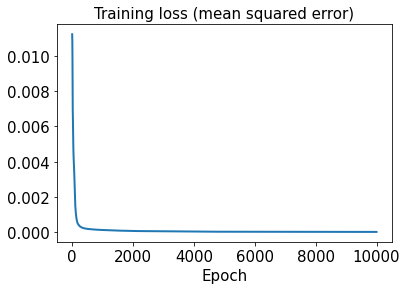

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

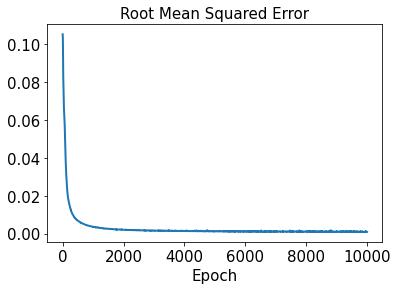

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

5/5 [==============================] - 0s 2ms/step - loss: 1.3611e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train_m2 = np.sum((sd.predict(x_train) - y_train)**2) / np.sum(y_train**2)
print(l2_error_train_m2)

8.360338e-05


In [54]:
l2_error_test_m2 = np.sum((sd.predict(x_test) - y_test)**2) / np.sum(y_test**2)
print(l2_error_test_m2)

0.00036969487


In [55]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00020768029


In [56]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.00092136353


In [57]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[8.957818e-05, 0.00019243192, 0.00022015139, 0.00011940697, 0.00026981375, 0.000254105, 0.00016173867, 0.00025624727, 0.00011171545, 0.00021124382, 9.508156e-05, 7.8367375e-05, 0.00029089474, 0.000118551914, 0.00020100977, 0.00016383144, 0.00017617464, 0.00015859757, 0.00015605336, 0.00010605778, 0.00010466754, 0.00012514631, 0.00023397223, 0.00017639723, 0.0009654795, 0.00012115039, 0.00029461438, 0.00045678602, 0.00012198314, 0.0003245342, 0.0004725077, 0.00013150177, 0.00015912054, 0.00021077444, 0.00019375507, 0.00011152015, 8.909658e-05, 7.186658e-05, 0.0008001986, 0.00015357781, 0.00013323783, 0.00023330626, 0.00020632577, 0.0001974136, 0.00014109394, 0.00016113202, 0.00030799056, 0.00024475588, 0.00021061256, 0.00016341323, 0.00031450493, 0.00013108886, 0.00012863586, 0.00032450716, 0.0002023449, 7.700837e-05, 0.00040706297, 0.00014212298, 0.00043388052, 0.00011414473, 0.00033000717, 0.00035666497, 9.222125e-05, 0.00020727601, 0.0001442907, 0.00016251847, 0.00020322147, 0.000363

In [58]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.00057550106, 0.0010475485, 0.0017111776, 0.0004620401, 0.0015235287, 0.00058100536, 0.00087531103, 0.00027773294, 0.00036962028, 0.0023094427, 0.00038959828, 0.00040579, 0.0005498425, 0.001819801, 0.001040785]


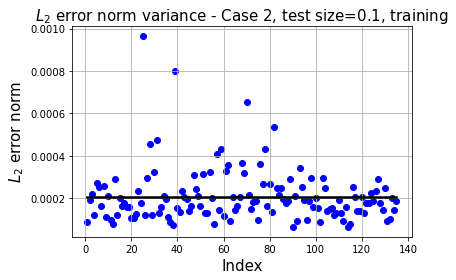

In [59]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

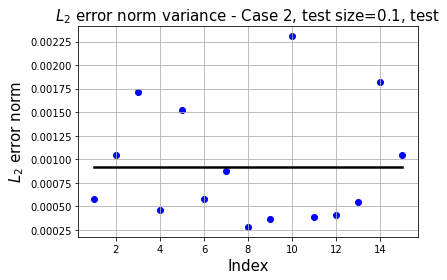

In [60]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

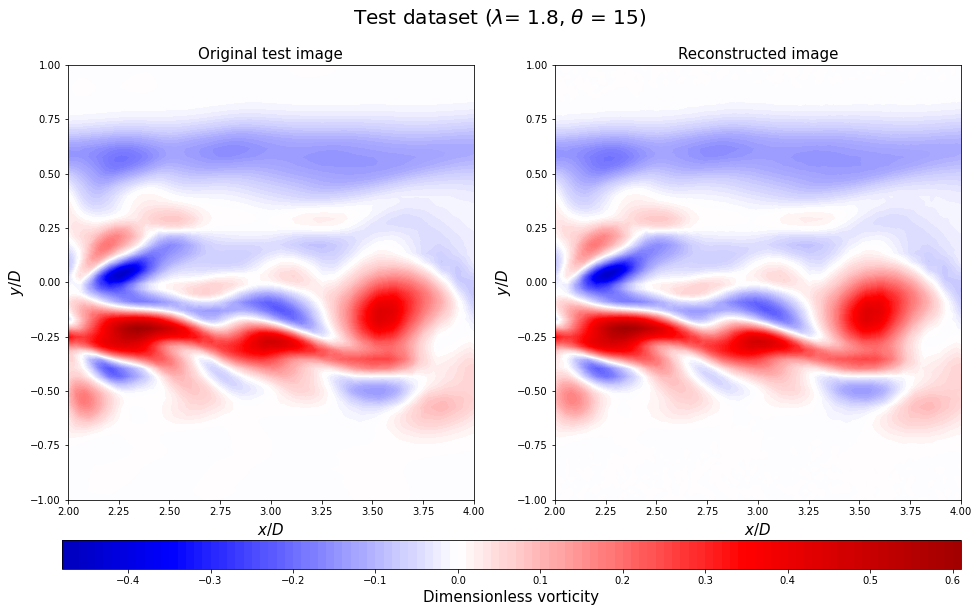

In [61]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

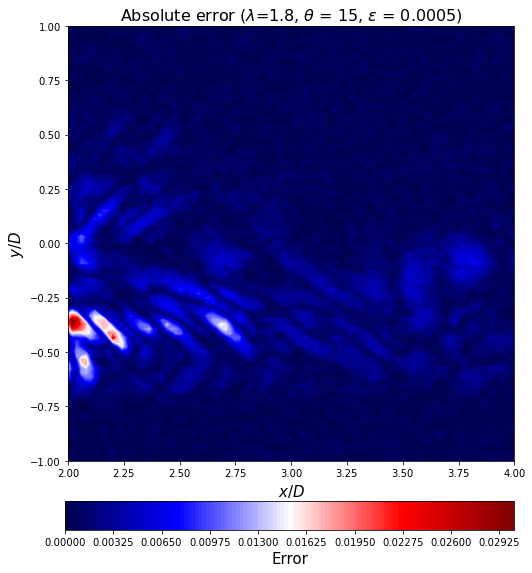

In [62]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()